In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from netCDF4 import Dataset
import cdsapi
from numpy.linalg import svd
from scipy.optimize import minimize
from numpy.linalg import matrix_rank
import scipy

#import cdstoolbox as ct


In [2]:
panel_data = pd.read_pickle('panel_data')
data = pd.read_pickle('data')
panel_data2 = pd.read_pickle('panel_data2')
data2 = pd.read_pickle('data2')
#data['INM_CM4'] = data2['INM_CM4']
#data['CAMS_CSM1'] = data2['CAMS_CSM1']
proj = pd.read_pickle('projections')
data

ACCESS_CM2  BCC_XSM2_MR  CanESM5_CanOE  CNRM_CM6      KACE     CESM2  \
0      0.375954    -0.601654       0.070961 -0.263155 -0.206761  0.057175   
1      0.973208    -0.662668      -0.037884  0.319128 -0.384065 -0.042319   
2      0.497969    -0.236120      -0.114808 -0.195107 -0.173415 -0.133353   
3      0.357068    -0.233272       0.024674 -0.306039 -0.275843  0.023327   
4      0.355483    -0.753469      -0.313223 -0.075585 -0.398944 -0.064955   
..          ...          ...            ...       ...       ...       ...   
158    1.070729     0.772349       1.579082  1.122791  1.636726  1.108791   
159    0.946666     0.733400       1.599628  1.109937  1.334453  1.507458   
160    1.065684     0.820573       1.562484  1.030424  1.651888  1.512052   
161    1.747993     0.953064       2.044906  1.123876  1.306054  1.466749   
162    1.440901     0.918503       2.201975  1.082332  1.536155  1.689176   

     CNRM_ESM1  GFDL_ESM4    UKESM1  HadGEM_GC31_LL    MIROC6      TRUE  
0     0.424696  -0.363606  0.640044        0.549923  0.045581 -0.348009  
1     0.248771  -0.324211  0.712845        0.604639  0.135325 -0.395596  
2     0.194304   0.041495  0.932074        0.642588 -0.020864 -0.225602  
3    -0.006229  -0.269533  0.806349        0.375610  0.286527 -0.395580  
4    -0.238467  -0.468456  0.632522        0.591042  0.626435 -0.318921  
..         ...        ...       ...             ...       ...       ...  
158   1.009894   0.657472  1.795474        1.507112  1.469412  0.619857  
159   1.104560   0.985515  1.649651        1.816843  1.159357  0.925151  
160   0.983257   0.578576  2.046785        2.161680  0.824013  0.729730  
161   1.093769   0.767760  1.740632        2.242140  1.091642  0.717177  
162   1.049651   0.846035  2.113947        1.872814  1.361308  0.606018  

[163 rows x 12 columns]

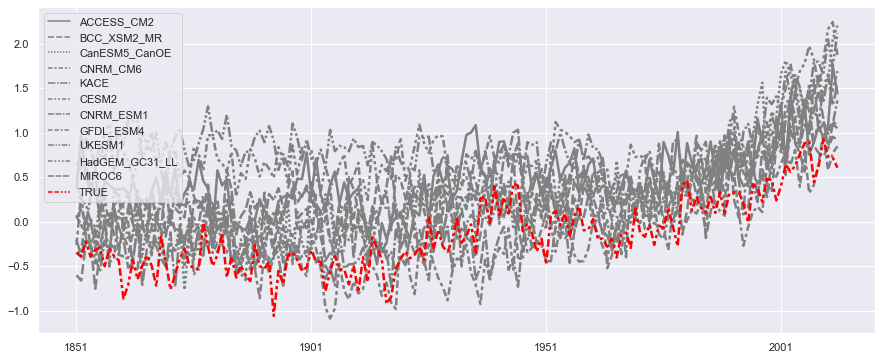

In [3]:
data.rename(index=lambda s: str(int(s) + 1851), inplace=True)
sns.set_theme(style="darkgrid")
f, ax = plt.subplots(figsize=(15, 6))
palette = {c:'red' if c=='TRUE' else  'grey' for c in panel_data.model.unique()}

g=sns.lineplot(data=data, linewidth=2.5,palette=palette)
plt.xticks([0, 50, 100,150])


panel_data
plt.savefig('temp1')

In [5]:
from pykalman import KalmanFilter

def Kalman1D(observations,damping=1):
    # To return the smoothed time series data
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state

def Kalman1D_plot(observations,damping=1):
    # To return the plot
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    plt.plot(pred_state)
    plt.plot(observations,linestyle='--',color='grey',linewidth=0.5)

def find_trend():
    trends ={}
    for i in panel_data['model']:
        XT1 = panel_data.loc[i].loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
        trends[i]=Kalman1D(XT1).flatten()
    trend = pd.DataFrame.from_dict(trends) 
    return trend
    


<AxesSubplot:>

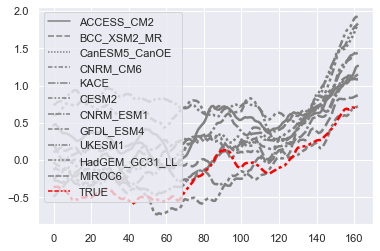

In [6]:
trend = find_trend()
sns.lineplot(data=trend, linewidth=2.5,palette=palette)  

In [7]:
trend

ACCESS_CM2  BCC_XSM2_MR  CanESM5_CanOE  CNRM_CM6      KACE     CESM2  \
0      0.465615    -0.492257       0.008669 -0.132312 -0.264281 -0.030860   
1      0.483548    -0.470378      -0.003789 -0.106144 -0.275785 -0.048467   
2      0.452514    -0.429269      -0.012838 -0.122502 -0.276461 -0.066688   
3      0.416934    -0.407476      -0.011689 -0.131600 -0.287442 -0.078243   
4      0.387342    -0.403103      -0.014177 -0.123255 -0.299582 -0.099956   
..          ...          ...            ...       ...       ...       ...   
158    1.086211     0.834462       1.606457  1.083166  1.400473  1.356925   
159    1.124474     0.835827       1.653230  1.084049  1.412164  1.398871   
160    1.180518     0.847436       1.705363  1.082344  1.431625  1.429957   
161    1.248045     0.861730       1.771783  1.085830  1.429061  1.452834   
162    1.265577     0.866891       1.810892  1.085512  1.438796  1.474320   

     CNRM_ESM1  GFDL_ESM4    UKESM1  HadGEM_GC31_LL    MIROC6      TRUE  
0     0.213367  -0.255787  0.735336        0.600677  0.107139 -0.356821  
1     0.171101  -0.234223  0.754395        0.610828  0.119451 -0.358584  
2     0.121068  -0.203660  0.777608        0.621598  0.130175 -0.356645  
3     0.063712  -0.197613  0.785375        0.630269  0.156004 -0.367811  
4     0.013350  -0.184373  0.791044        0.664406  0.168779 -0.376199  
..         ...        ...       ...             ...       ...       ...  
158   1.113256   0.648426  1.694142        1.790452  1.134174  0.689228  
159   1.100753   0.685230  1.733985        1.841868  1.125626  0.707312  
160   1.087870   0.692006  1.782261        1.895787  1.113705  0.703613  
161   1.085448   0.710125  1.804085        1.923116  1.130754  0.697302  
162   1.082193   0.722480  1.832254        1.918543  1.151713  0.689003  

[163 rows x 12 columns]

In [8]:
from sklearn.metrics import mean_squared_error

def find_initial_errors(df):
    diction = dict()
    for (index, colname) in enumerate(df):
        diction[colname] = mean_squared_error(df[colname], df['TRUE'], squared='FALSE')
    print(diction)
    keys = list(diction.keys())
# get values in the same order as keys, and parse percentage values
    vals = [float(diction[k]) for k in keys]
    f, ax = plt.subplots(figsize=(15, 6))

    sns.barplot(x=keys, y=vals)
    return diction

{'ACCESS_CM2': 0.49331557789127595, 'BCC_XSM2_MR': 0.18684780471072399, 'CanESM5_CanOE': 0.3210646409663524, 'CNRM_CM6': 0.14410759688621047, 'KACE': 0.15026140306994745, 'CESM2': 0.26554959257373734, 'CNRM_ESM1': 0.2134831471840875, 'GFDL_ESM4': 0.21720294538433021, 'UKESM1': 1.1205402510203701, 'HadGEM_GC31_LL': 0.959958410216865, 'MIROC6': 0.3782243752391241, 'TRUE': 0.0}


0         1         2         3         4         5  \
ACCESS_CM2      0.375954  0.973208  0.497969  0.357068  0.355483  0.075743   
BCC_XSM2_MR    -0.601654 -0.662668 -0.236120 -0.233272 -0.753469 -0.352483   
CanESM5_CanOE   0.070961 -0.037884 -0.114808  0.024674 -0.313223  0.342073   
CNRM_CM6       -0.263155  0.319128 -0.195107 -0.306039 -0.075585 -0.040837   
KACE           -0.206761 -0.384065 -0.173415 -0.275843 -0.398944 -0.570094   
CESM2           0.057175 -0.042319 -0.133353  0.023327 -0.064955 -0.464965   
CNRM_ESM1       0.424696  0.248771  0.194304 -0.006229 -0.238467 -0.277502   
GFDL_ESM4      -0.363606 -0.324211  0.041495 -0.269533 -0.468456 -0.063029   
UKESM1          0.640044  0.712845  0.932074  0.806349  0.632522  0.871653   
HadGEM_GC31_LL  0.549923  0.604639  0.642588  0.375610  0.591042  0.710176   
MIROC6          0.045581  0.135325 -0.020864  0.286527  0.626435 -0.085767   
TRUE           -0.348009 -0.395596 -0.225602 -0.395580 -0.318921 -0.292743   

                       6         7         8         9  ...       154  \
ACCESS_CM2      0.457747  0.404658  0.364769  0.359265  ...  0.877988   
BCC_XSM2_MR    -0.217083 -0.243474 -0.290667 -0.375541  ...  0.771382   
CanESM5_CanOE   0.041480 -0.054697  0.089825  0.022939  ...  1.484307   
CNRM_CM6       -0.096191  0.090064 -0.148201 -0.279353  ...  1.067770   
KACE           -0.213835 -0.354035  0.150916 -0.065190  ...  1.173276   
CESM2           0.064814 -0.452447 -0.422981  0.120920  ...  1.224203   
CNRM_ESM1      -0.013747 -0.504865  0.339638  0.290103  ...  1.101596   
GFDL_ESM4       0.278416 -0.076807  0.196711 -0.371597  ...  0.391741   
UKESM1          0.699701  0.936906  0.815910  1.031701  ...  1.511475   
HadGEM_GC31_LL  1.019449  1.091706  0.507917  0.833559  ...  1.688518   
MIROC6         -0.032126  0.024868  0.183334  0.251997  ...  0.839724   
TRUE           -0.501344 -0.304632 -0.388180 -0.436533  ...  0.757958   

                     155       156       157       158       159       160  \
ACCESS_CM2      1.331639  0.754243  0.893143  1.070729  0.946666  1.065684   
BCC_XSM2_MR     0.562137  1.137145  0.848418  0.772349  0.733400  0.820573   
CanESM5_CanOE   1.195094  1.546099  1.464548  1.579082  1.599628  1.562484   
CNRM_CM6        1.397045  1.240175  0.899289  1.122791  1.109937  1.030424   
KACE            1.244752  1.361589  1.447278  1.636726  1.334453  1.651888   
CESM2           1.257094  1.517293  1.265665  1.108791  1.507458  1.512052   
CNRM_ESM1       1.184901  0.985517  1.596023  1.009894  1.104560  0.983257   
GFDL_ESM4       0.796102  0.320017  0.413391  0.657472  0.985515  0.578576   
UKESM1          1.248112  1.406077  1.794811  1.795474  1.649651  2.046785   
HadGEM_GC31_LL  1.776143  1.970851  1.823069  1.507112  1.816843  2.161680   
MIROC6          1.089104  0.998434  1.260334  1.469412  1.159357  0.824013   
TRUE            0.879893  0.901505  0.444649  0.619857  0.925151  0.729730   

                     161       162           model  
ACCESS_CM2      1.747993  1.440901      ACCESS_CM2  
BCC_XSM2_MR     0.953064  0.918503     BCC_XSM2_MR  
CanESM5_CanOE   2.044906  2.201975   CanESM5_CanOE  
CNRM_CM6        1.123876  1.082332        CNRM_CM6  
KACE            1.306054  1.536155            KACE  
CESM2           1.466749  1.689176           CESM2  
CNRM_ESM1       1.093769  1.049651       CNRM_ESM1  
GFDL_ESM4       0.767760  0.846035       GFDL_ESM4  
UKESM1          1.740632  2.113947          UKESM1  
HadGEM_GC31_LL  2.242140  1.872814  HadGEM_GC31_LL  
MIROC6          1.091642  1.361308          MIROC6  
TRUE            0.717177  0.606018            TRUE  

[12 rows x 164 columns]

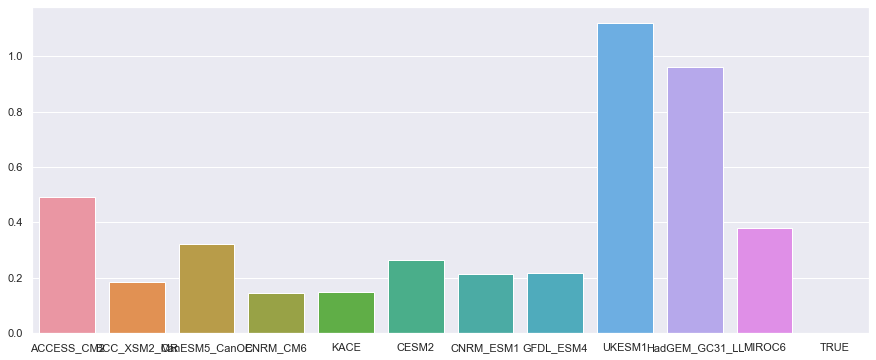

In [9]:

find_initial_errors(data)
panel_data

In [11]:
#projections
proj = pd.read_pickle('projections')
proj2 = pd.read_pickle('projections2')
X=proj

#pred = (X).dot(wasc)
true = 'Downloads/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc'
fh = Dataset(true, mode='r')
tas = fh.variables["tas_mean"][:]
temp_mean = tas.mean(axis =(1,2))
proj_true_temp=temp_mean[1979:]
print(proj_true_temp.shape)

proj_true_temp = np.average(proj_true_temp.reshape(-1, 3), axis=1)
proj =[]
for i in range(0,29,4):
    proj.append(proj_true_temp[i])

(87,)


In [12]:
proj_panel = X.T
proj_2014_2022 = proj_panel.loc[:,[i for i in list(range(0, 8))]].values


In [14]:
from pykalman import KalmanFilter

def Kalman1D(observations,damping=1):
    # To return the smoothed time series data
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.1
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    return pred_state

def Kalman1D_plot(observations,damping=1):
    # To return the plot
    observation_covariance = damping
    initial_value_guess = observations[0]
    transition_matrix = 1
    transition_covariance = 0.0001
    initial_value_guess
    kf = KalmanFilter(
            initial_state_mean=initial_value_guess,
            initial_state_covariance=observation_covariance,
            observation_covariance=observation_covariance,
            transition_covariance=transition_covariance,
            transition_matrices=transition_matrix
        )
    pred_state, state_cov = kf.smooth(observations)
    plt.plot(pred_state)
    plt.plot(observations,linestyle='--',color='grey',linewidth=0.5)

def find_trend():
    trends ={}
    for i in range(0,11):
        XT1 = X0_all_plot[i]#.loc[i].loc[:,[i for i in list(range(0, 163))]].values.reshape(-1,1)
        trends[i]=Kalman1D(XT1).flatten()
    trend = pd.DataFrame.from_dict(trends)
    return trend
    
  

In [13]:
import nlopt


from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

date = np.arange(1850,2013)
tr = pd.DataFrame()
tr['date'] = date
tr['obs'] = X1_all_plot
tr['synthetic'] = (X0_all_plot.T).dot(W0)
tr.set_index(['date'])
tr
plot_acf(tr['obs'])
plt.savefig('auto')
plt.show()
plot_acf(tr['synthetic'])
plt.show()
results = adfuller(X1_all_plot)
print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print("\t%s: %.3f" % (key, value))

NameError: name 'X1_all_plot' is not defined

In [91]:
X

ACCESS_CM2  BCC_XSM2_MR  CanESM5_CanOE  CNRM_CM6      KACE     CESM2  \
0     2.192911     0.930684       2.036687  1.971929  1.784486  1.514276   
1     2.076397     1.510546       1.763232  1.529481  1.790835  1.397761   
2     1.984288     1.287989       2.449264  1.038935  1.967710  1.305652   
3     2.372274     1.091322       2.339755  1.427129  1.532328  1.693639   
4     1.743446     1.418214       2.728170  1.391812  1.951774  1.064810   
5     2.204255     1.132816       2.273553  1.254371  2.168281  1.525619   
6     2.172036     1.367114       2.628696  1.704521  2.549220  1.493401   
7     2.149017     1.143746       2.781628  2.185024  2.379565  1.470381   
8     2.366771     1.280317       2.830437  1.773653  2.811929  1.688135   
9     2.820357     1.456142       2.924438  1.792671  2.387379  2.141721   
10    2.627708     1.607548       3.074417  1.735983  2.337158  1.949073   
11    2.873734     1.337439       3.360732  2.075531  2.750868  2.195098   
12    2.920296     1.453399       3.416417  1.673213  2.961655  2.241661   
13    2.858159     1.424451       3.443553  1.491786  2.923830  2.179524   
14    2.927946     0.943346       3.319353  1.963354  2.684265  2.249310   
15    2.835949     1.753531       3.232121  1.664796  2.686492  2.157313   
16    2.980447     1.550250       2.670395  1.890230  3.202937  2.301811   
17    2.875230     1.807096       3.363748  1.722051  2.902209  2.196594   
18    3.011502     1.998329       3.093659  1.872800  3.308187  2.332866   
19    3.249480     1.869733       3.409409  1.682342  2.910011  2.570844   
20    3.069564     2.300173       3.247070  1.900531  3.193893  2.390928   
21    3.283392     1.912274       3.126141  1.570457  3.286355  2.604757   
22    3.327422     2.142991       3.268583  1.268372  3.190220  2.648787   
23    3.226373     1.948610       3.057690  2.374402  3.408787  2.547738   
24    3.254392     1.770885       3.572282  1.857901  3.429421  2.575757   
25    3.307369     2.181568       3.504218  2.299451  3.674553  2.628733   
26    3.455617     1.923951       3.617765  1.724408  3.464560  2.776981   
27    2.798978     2.072518       3.460875  1.731129  3.476414  2.120342   
28    3.031474     1.439918       3.493428  2.309829  3.517621  2.352838   
29    2.979062     1.706674       3.189908  1.943274  3.279392  2.300427   
30    3.568919     1.804219       3.709511  1.761618  3.341068  2.890284   
31    3.600542     2.107071       3.873534  1.897683  3.300896  2.921906   
32    3.228450     2.127081       3.737540  1.827800  3.711125  2.549814   

    CNRM_ESM1  GFDL_ESM4    UKESM1  HadGEM_GC31_LL    MIROC6  
0    1.284411   0.757471  2.034565        2.454116  0.804869  
1    1.406644   1.168522  2.307194        2.060158  0.985175  
2    1.251774   0.672957  2.433012        2.775840  1.182812  
3    1.337593   0.958271  2.344813        2.531013  1.493820  
4    1.176898   1.039623  2.473669        2.547947  1.916205  
5    1.879654   1.540300  2.550606        2.581470  1.552623  
6    2.160151   1.161114  2.899829        2.192544  1.293446  
7    1.407566   1.414248  2.839142        2.814822  1.571967  
8    1.816908   1.149742  2.966970        2.471898  1.548329  
9    1.798921   1.361322  3.053297        2.848452  1.845437  
10   1.556750   1.499724  2.731185        2.821375  1.596949  
11   1.514928   1.316907  2.957843        2.795825  1.326156  
12   1.602755   1.614014  3.236553        3.128741  1.476604  
13   1.508264   1.535368  2.747622        2.978383  1.734578  
14   1.262641   1.493767  2.941777        2.775275  1.881392  
15   1.545286   1.578475  3.271133        3.015198  2.088203  
16   1.315327   1.393238  3.101727        2.986047  1.634680  
17   1.401393   1.480693  3.178720        2.784239  1.573486  
18   1.777451   1.529862  3.685704        3.007333  1.371863  
19   1.486905   1.319279  3.156097        3.304796  1.762799  
20   1.565049   1.492076  3.419282        3.236373  1.849890  
21   1.423934   1.329338  3.79081

# Synthetic Controls

In [15]:
#first approach naive least square regression with no additional predictors 
#test with one of the models because current true temperature data do not seem correct
from scipy.optimize import fmin_slsqp
from sklearn.metrics import mean_squared_error



In [16]:

X1_all =  panel_data.loc['TRUE']
X0_all = panel_data.loc[panel_data.index != 'TRUE', :]

#use years 120-150 as predictors leave rest  for validation
X0 = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1 = X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
X0_val = X0_all.loc[:,[i for i in list(range(0, 163))]].values.T
X1_val = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
#5-year avg
X0_mean = X0_all.loc[:,[i for i in list(range(0, 120))]].values
X1_mean = X1_all.loc[[i for i in list(range(0, 120))]].values.reshape(-1,1)
X0_mean_val = X0_all.loc[:,[i for i in list(range(120, 160))]].values
X1_mean_val = X1_all.loc[[i for i in list(range(120, 160))]].values.reshape(-1,1)
X1_mean = np.average(X1_mean.reshape(-1, 5), axis=1).reshape(-1,1)
#X0_mean = np.average(X0_mean.reshape(-1, 5), axis=1).reshape(24,13)
#X0_mean_val = np.average(X0_mean_val.reshape(-1, 5), axis=1).reshape(8,13)
X1_mean_val = np.average(X1_mean_val.reshape(-1, 5), axis=1).reshape(-1,1)
#use years 0-50
X0_zero = X0_all.loc[:,[i for i in list(range(0, 50))]].values.T
X1_zero = X1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 13-63, 113-163
X0_double_int1 = X0_all.loc[:,[i for i in list(range(13, 63))+list(range(113, 163))]].values.T
X1_double_int1 = X1_all.loc[[i for i in list(range(13, 63))+list(range(113, 163))]].values.reshape(-1,1)
#use years 100-163
X0_100_163 = X0_all.loc[:,[i for i in list(range(100, 163))]].values.T
X1_100_163 = X1_all.loc[[i for i in list(range(100, 163))]].values.reshape(-1,1)
#use years 100-150
X0_hundreed = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1_hundreed= X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 90-140 0-50
X0_double_int2= X0_all.loc[:,[i for i in list(range(90, 140))+ list(range(0, 50))]].values.T
X1_double_int2 = X1_all.loc[[i for i in list(range(90, 140))+ list(range(0, 50))]].values.reshape(-1,1)
#use years 110-163
X0_110_163 = X0_all.loc[:,[i for i in list(range(110, 163))]].values.T
X1_110_163 = X1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
X0_0_150 = X0_all.loc[:,[i for i in list(range(0, 150))]].values.T
X1_0_150 = X1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)

X0_all_plot = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X0_all_plot = np.hstack((X0_all_plot,proj_2014_2022))
X1_all_plot = np.concatenate([X1_all.loc[[i for i in list(range(0, 163))]].values, proj]).reshape(-1,1)


In [24]:
X0_trend = find_trend()
X1_trend = pd.DataFrame.from_dict(Kalman1D(X1_all_plot).flatten())
X0_all = pd.DataFrame(X0_all_plot)
X1_all= pd.DataFrame(X1_all_plot)

In [25]:
def w_mse(w,  x0, x1, v): return mean_squared_error(x1, x0.dot(w), sample_weight=v)
def w_constraint(w,  x0, x1,v): return np.sum(w) - 1 

def v_constraint(V, W, X0, X1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w,  bounds=[(0, 1.0)]*len(w),f_eqcons=w_constraint, 
                                           args=( x0, x1,v), disp=False, full_output=True)[0]
def solve_synthetic_control_basic(X0, X1,weight=False):
    k,j= X0.shape
    V = (1/k)*np.ones(k)
    l = np.linspace(1/k,1,k,endpoint=True)
    if weight:
        for i in range(0,k):
            V[i]=l[i]*2
    W0 = 1/j*np.zeros(j).transpose()
    W = fun_w(W0, V, X0, X1)
   # print(W)
    #print(V)
    return V, W



In [47]:
def remain_error(W, df_donors,df_true, low_bound1,up_bound1,low_bound2,up_bound2):
    if(low_bound2 ==0):
        l = list(range(0, low_bound1))+list(range(up_bound1+1, 170))
    else:   
        l = list(range(0, low_bound1))+list(range(up_bound1+1, low_bound2)) +list(range(up_bound2+1, 170))
    df1 = df_true.loc[[i for i in l]].values.reshape(-1,1)
    df0 = df_donors.loc[:,[i for i in l]].values
    return mean_squared_error( df1,(df0.T).dot(W),squared=False) 
    

In [27]:
X0_trend


0         1         2         3         4         5         6   \
0    0.465615 -0.492257  0.008669 -0.132312 -0.264281 -0.030860  0.213367   
1    0.483548 -0.470378 -0.003789 -0.106144 -0.275785 -0.048467  0.171101   
2    0.452514 -0.429269 -0.012838 -0.122502 -0.276461 -0.066688  0.121068   
3    0.416934 -0.407476 -0.011689 -0.131600 -0.287442 -0.078243  0.063712   
4    0.387342 -0.403103 -0.014177 -0.123255 -0.299582 -0.099956  0.013350   
..        ...       ...       ...       ...       ...       ...       ...   
166  1.965217  1.175488  2.291608  1.424659  1.875236  1.440687  1.394362   
167  1.981827  1.199775  2.363831  1.461324  1.956640  1.421141  1.446853   
168  2.022275  1.202217  2.399621  1.504941  2.038531  1.437228  1.526338   
169  2.044526  1.211600  2.448017  1.573614  2.107446  1.444475  1.570493   
170  2.054025  1.205432  2.478345  1.629197  2.132184  1.446830  1.555681   

           7         8         9         10  
0   -0.255787  0.735336  0.600677  0.107139  
1   -0.234223  0.754395  0.610828  0.119451  
2   -0.203660  0.777608  0.621598  0.130175  
3   -0.197613  0.785375  0.630269  0.156004  
4   -0.184373  0.791044  0.664406  0.168779  
..        ...       ...       ...       ...  
166  1.009298  2.364850  2.408205  1.356243  
167  1.070382  2.433728  2.437276  1.417826  
168  1.134541  2.498612  2.455279  1.429571  
169  1.158124  2.558297  2.460664  1.429010  
170  1.181408  2.583828  2.492860  1.442006  

[171 rows x 11 columns]

mean squared reconstruction error using T=0-50:  0.14135809617466097
validation error:  0.3926392376841436
W: [0.00000000e+00 8.37947739e-18 0.00000000e+00 4.12801757e-01
 5.87198243e-01 7.54871975e-18 2.77971864e-17 0.00000000e+00
 0.00000000e+00 1.93876169e-17 0.00000000e+00]
mean squared reconstruction error using T=13-63, 113-163:  0.09715382867672874
validation error:  0.30344446817479614
W: [5.66597183e-17 7.82618973e-18 3.28261803e-17 6.24010738e-01
 4.40576073e-03 1.92899803e-17 3.65901385e-19 3.71583501e-01
 4.93003092e-18 0.00000000e+00 2.39562377e-18]
mean squared reconstruction error using T=100-163:  0.12184358206178225
validation error:  0.39910915170204325
W: [1.14261645e-17 2.96305564e-17 0.00000000e+00 2.57769982e-01
 0.00000000e+00 2.32832489e-18 1.16258531e-01 6.25971487e-01
 1.59266113e-18 5.46953203e-18 0.00000000e+00]
mean squared reconstruction error using T=100-150:  0.12290352047226842
validation error:  0.3858749148431207
W: [6.73995600e-18 3.08275546e-18 1.31

<Figure size 1260x324 with 0 Axes>

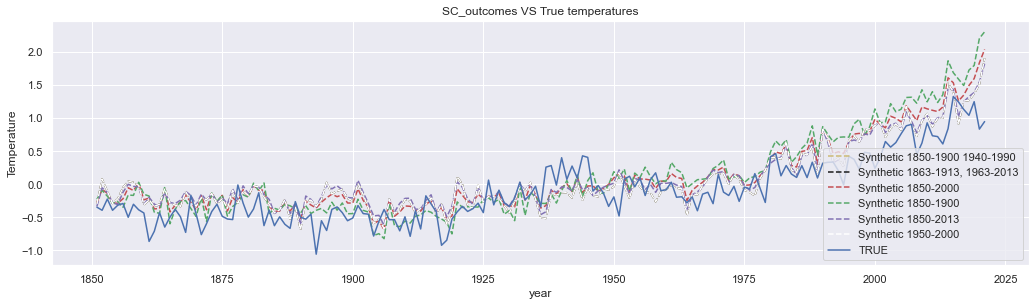

0.09715382867672874
[5.66597183e-17 7.82618973e-18 3.28261803e-17 6.24010738e-01
 4.40576073e-03 1.92899803e-17 3.65901385e-19 3.71583501e-01
 4.93003092e-18 0.00000000e+00 2.39562377e-18]


In [28]:
w = pd.DataFrame()

#use 0-50
V, W = solve_synthetic_control_basic(X0_zero, X1_zero)
SC_outcomes = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50,0,0)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
print('W:', W)
w['T=0-50'] = W

#use 13-63, 113-163
V0, W0 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1)
SC_outcomes0 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=3-63, 113-163'] = W0

#use 100-163
V0, W1 = solve_synthetic_control_basic(X0_100_163, X1_100_163)
SC_outcomes1 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error =  remain_error(W1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w['T=100-163'] = W1

#use100-150
V0, W5 = solve_synthetic_control_basic(X0_hundreed, X1_hundreed)
SC_outcomes5 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w['T=100-150'] = W5

#use 90-140 0-50
V0, W2 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1)
SC_outcomes2 = (X0_all_plot.T).dot(W2)
true_outcomes = X1_all_plot
true_error = remain_error(W2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)
w['T=90-140 0-50'] = W2




#use 0-150
V0, W4 = solve_synthetic_control_basic(X0_0_150, X1_0_150)
SC_outcomes4 = (X0_all_plot.T).dot(W4)
true_outcomes = X1_all_plot
true_error = remain_error(W4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)
print('W:', W4)
w['T=0-150'] = W4



fig = plt.figure(figsize=(17.5,4.5)) 

V0, W0_no_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,False)
SC_outcomes_all = (X0_all_plot.T).dot(W0_no_weight)
true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(W0_no_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', W0_no_weight)
w['T=0-163'] = W0_no_weight
fig = plt.figure(figsize=(17.5,4.5)) 
#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");

plt.plot(range(1851,2022),SC_outcomes2,'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),SC_outcomes0,'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2022),SC_outcomes4,'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),SC_outcomes,'g--', label="Synthetic 1850-1900");
plt.plot(range(1851,2022),SC_outcomes_all,'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),SC_outcomes5,'w--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),true_outcomes, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures")
plt.show()
fig.savefig("sc1", dpi=300)
print(mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print(W0)

In [29]:
w = pd.DataFrame()

#use 0-50
V, W = solve_synthetic_control_basic(X0_zero, X1_zero)
SC_outcomes = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_trend.T,X1_trend, 0,50,0,0)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
print('W:', W)
w['T=0-50'] = W

#use 13-63, 113-163
V0, W0 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1)
SC_outcomes0 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_trend.T,X1_trend, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w['T=3-63, 113-163'] = W0

#use 100-163
V0, W1 = solve_synthetic_control_basic(X0_100_163, X1_100_163)
SC_outcomes1 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error =  remain_error(W1, X0_trend.T,X1_trend, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w['T=100-163'] = W1

#use100-150
V0, W5 = solve_synthetic_control_basic(X0_hundreed, X1_hundreed)
SC_outcomes5 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W5, X0_trend.T,X1_trend, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w['T=100-150'] = W5

#use 90-140 0-50
V0, W2 = solve_synthetic_control_basic(X0_double_int2, X1_double_int2)
SC_outcomes2 = (X0_all_plot.T).dot(W2)
true_outcomes = X1_all_plot
true_error = remain_error(W2, X0_trend.T,X1_trend, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)
w['T=90-140 0-50'] = W2




#use 0-150
V0, W4 = solve_synthetic_control_basic(X0_0_150, X1_0_150)
SC_outcomes4 = (X0_all_plot.T).dot(W4)
true_outcomes = X1_all_plot
true_error = remain_error(W4, X0_trend.T,X1_trend, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)
print('W:', W4)
w['T=0-150'] = W4



V0, W0_no_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,False)
SC_outcomes_all = (X0_all_plot.T).dot(W0_no_weight)
true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(W0_no_weight, X0_trend.T,X1_trend, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', W0_no_weight)
w['T=0-163'] = W0_no_weight


mean squared reconstruction error using T=0-50:  0.14135809617466097
validation error:  0.33887013679729117
W: [0.00000000e+00 8.37947739e-18 0.00000000e+00 4.12801757e-01
 5.87198243e-01 7.54871975e-18 2.77971864e-17 0.00000000e+00
 0.00000000e+00 1.93876169e-17 0.00000000e+00]
mean squared reconstruction error using T=13-63, 113-163:  0.09715382867672874
validation error:  0.19987955083303555
W: [5.66597183e-17 7.82618973e-18 3.28261803e-17 6.24010738e-01
 4.40576073e-03 1.92899803e-17 3.65901385e-19 3.71583501e-01
 4.93003092e-18 0.00000000e+00 2.39562377e-18]
mean squared reconstruction error using T=100-163:  0.12184358206178225
validation error:  0.3251453107349481
W: [1.14261645e-17 2.96305564e-17 0.00000000e+00 2.57769982e-01
 0.00000000e+00 2.32832489e-18 1.16258531e-01 6.25971487e-01
 1.59266113e-18 5.46953203e-18 0.00000000e+00]
mean squared reconstruction error using T=100-150:  0.12290352047226842
validation error:  0.3142431604354188
W: [6.73995600e-18 3.08275546e-18 1.31

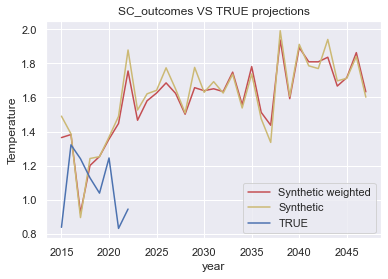

[0.8364805221400101, 1.3215710799326201, 1.2396620313735012, 1.1272278534155247, 1.0374700743273226, 1.2442480213989162, 0.8299812642028578, 0.943871047508812]


In [275]:

predicted_temp= (X).dot(W0_weight)
predicted_temp_no= (X).dot(W0_no_weight)

plt.plot(range(2015,2048),predicted_temp, 'r-', label="Synthetic weighted");
plt.plot(range(2015,2048),predicted_temp_no, 'y-', label="Synthetic");

plt.plot(range(2015,2023),proj, 'b-', label="TRUE");

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS TRUE projections")
plt.savefig('projections')
plt.show()
print(proj)


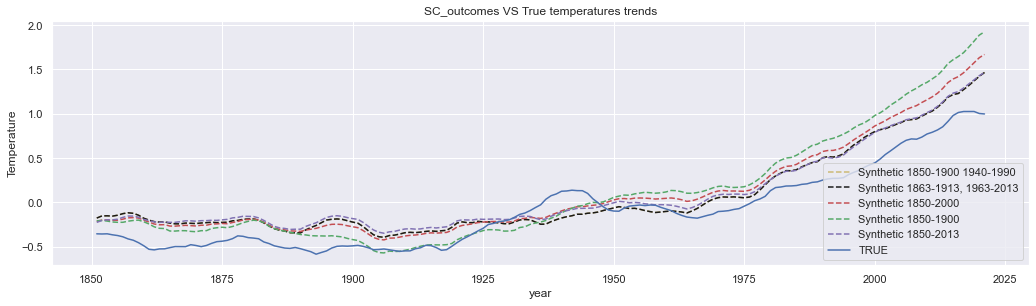

In [166]:
fig = plt.figure(figsize=(17.5,4.5))
plt.plot(range(1851,2022),(X0_trend).dot(W2),'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),(X0_trend).dot(W0),'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2022),(X0_trend).dot(W4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),(X0_trend).dot(W),'g--', label="Synthetic 1850-1900");
plt.plot(range(1851,2022),(X0_trend).dot(W0_no_weight),'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),X1_trend.values, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures trends")
fig.savefig("sc2", dpi=300)
plt.show()

In [107]:
proj3 = pd.read_pickle('projections3')
predicions = proj3.dot([4.83713345e-17, 1.35982560e-01, 0.00000000e+00 ,4.93114683e-01,
 6.16439665e-02, 0.00000000e+00, 5.48093424e-17 ,3.09258790e-01,
 8.72888450e-17 ,1.40150400e-16, 1.67290995e-17])
np.average(predicions[24:])

2.057912914938175

In [118]:
X1 =  panel_data.loc['TRUE']
X0 = panel_data.loc[panel_data.index != 'TRUE', :]

X0_all_p = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X1_all_p = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
c = mean_squared_error( X1_all_p,(X0_all_p.T).dot([4.83713345e-17, 1.35982560e-01, 0.00000000e+00 ,4.93114683e-01,
 6.16439665e-02, 0.00000000e+00, 5.48093424e-17 ,3.09258790e-01,
 8.72888450e-17 ,1.40150400e-16, 1.67290995e-17]),squared=False)
print(c)

0.2953877078520558


# Weighted SC

mean squared reconstruction error using T=0-50:  0.14006584198330385
validation error:  0.3903686223698868
W: [4.02114709e-17 0.00000000e+00 0.00000000e+00 4.35569578e-01
 5.64430422e-01 0.00000000e+00 5.18144270e-17 0.00000000e+00
 1.35515675e-17 0.00000000e+00 3.06220897e-17]
mean squared reconstruction error using T=13-63, 113-163:  0.09775145337354686
validation error:  0.3046806320871238
W: [1.80479697e-17 0.00000000e+00 0.00000000e+00 5.07927120e-01
 0.00000000e+00 1.23132526e-17 0.00000000e+00 4.92072880e-01
 0.00000000e+00 5.32370911e-17 6.53161774e-19]
mean squared reconstruction error using T=100-163:  0.13093383588913712
validation error:  0.41594985589665023
W: [0.00000000e+00 5.85701641e-02 2.91262412e-17 2.36180570e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.05249266e-01
 0.00000000e+00 2.07785500e-17 0.00000000e+00]
mean squared reconstruction error using T=100-150:  0.13230011615581103
validation error:  0.40249354557529615
W: [2.69734176e-18 1.34587388e-18 0.00

<Figure size 1260x324 with 0 Axes>

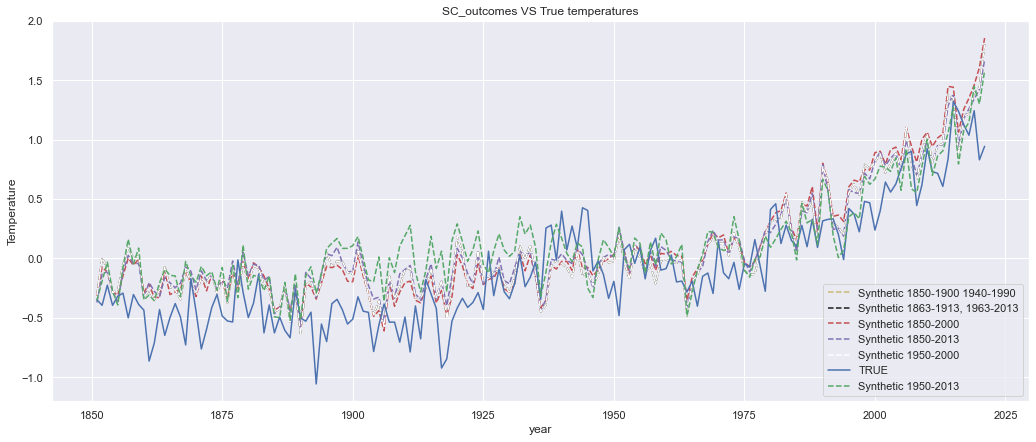

0.09775145337354686
[1.80479697e-17 0.00000000e+00 0.00000000e+00 5.07927120e-01
 0.00000000e+00 1.23132526e-17 0.00000000e+00 4.92072880e-01
 0.00000000e+00 5.32370911e-17 6.53161774e-19]


In [34]:
w1 = pd.DataFrame()
w1list=[]
#use 0-50
V, W = solve_synthetic_control_basic(X0_zero, X1_zero,True)
SC_outcomes = (X0_all_plot.T).dot(W)
true_outcomes = X1_all_plot
true_error =  remain_error(W, X0_all,X1_all, 0,50,0,0)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)
print('W:', W)
w1['T=0-50'] = W
w1list.append(W)

#use 13-63, 113-163
V0, W0 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1,True)
SC_outcomes0 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error = remain_error(W0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w1['T=3-63, 113-163'] = W0
w1list.append(W0)
#use 100-163
V0, W1 = solve_synthetic_control_basic(X0_100_163, X1_100_163,True)
SC_outcomes1 = (X0_all_plot.T).dot(W1)
true_outcomes = X1_all_plot
true_error =  remain_error(W1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w1['T=100-163'] = W1
w1list.append(W1)
#use100-150
V0, W5 = solve_synthetic_control_basic(X0_hundreed, X1_hundreed,True)
SC_outcomes5 = (X0_all_plot.T).dot(W0)
true_outcomes = X1_all_plot
true_error =  remain_error(W5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w1['T=100-150'] = W5
w1list.append(W5)
#use 90-140 0-50
V0, W2 = solve_synthetic_control_basic(X0_double_int1, X1_double_int1,True)
SC_outcomes2 = (X0_all_plot.T).dot(W2)
true_outcomes = X1_all_plot
true_error = remain_error(W2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)
w1['T=90-140 0-50'] = W2

w1list.append(W2)


#use 0-150
V0, W4 = solve_synthetic_control_basic(X0_0_150, X1_0_150,True)
SC_outcomes4 = (X0_all_plot.T).dot(W4)
true_outcomes = X1_all_plot
true_error = remain_error(W4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)
print('W:', W4)
w1['T=0-150'] = W4
w1list.append(W4)

fig = plt.figure(figsize=(17.5,4.5)) 

V0, W0_no_weight = solve_synthetic_control_basic(X0_all_plot.T, X1_all_plot,True)
SC_outcomes_all = (X0_all_plot.T).dot(W0_no_weight)
true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(W0_no_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', W0_no_weight)
w1['T=0-163'] = W0_no_weight
w1list.append(W0_no_weight)
fig = plt.figure(figsize=(17.5,7)) 
#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");

plt.plot(range(1851,2022),SC_outcomes2,'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),SC_outcomes0,'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2022),SC_outcomes4,'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),SC_outcomes_all,'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),SC_outcomes5,'w--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),true_outcomes, 'b-', label="TRUE");
plt.plot(range(1851,2022),SC_outcomes1,'g--', label="Synthetic 1950-2013");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures")
plt.show()
fig.savefig("sc1_weight", dpi=300)
print(mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print(W0)


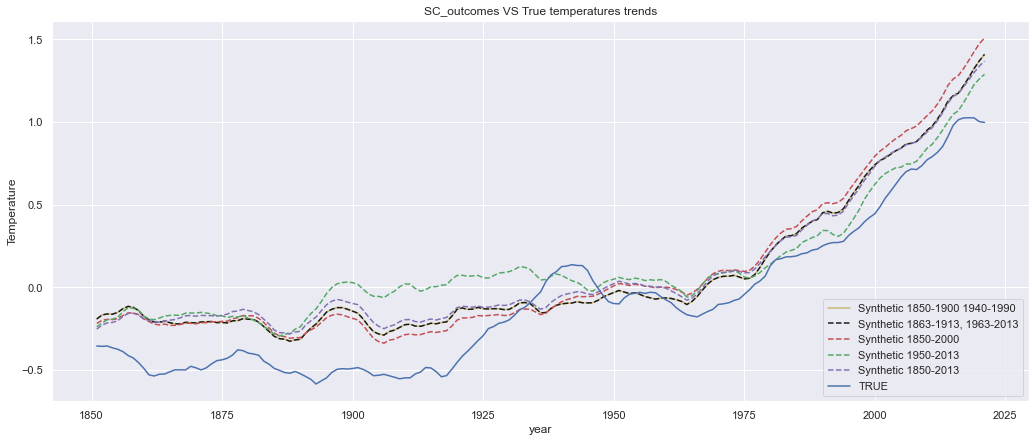

In [35]:
fig = plt.figure(figsize=(17.5,7))
plt.plot(range(1851,2022),(X0_trend).dot(W2),'y-', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),(X0_trend).dot(W0),'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2022),(X0_trend).dot(W4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),(X0_trend).dot(W1),'g--', label="Synthetic 1950-2013");
plt.plot(range(1851,2022),(X0_trend).dot(W0_no_weight),'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2022),X1_trend.values, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS True temperatures trends")
fig.savefig("sc2_weight", dpi=300)
plt.show()

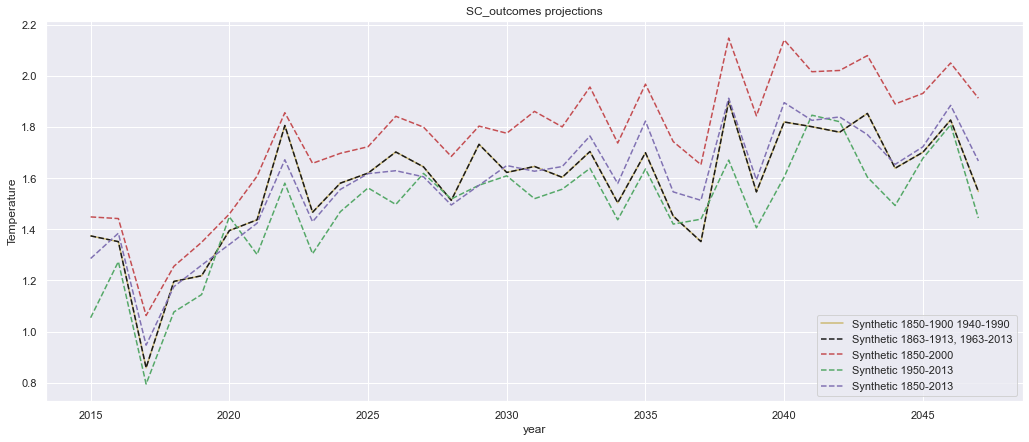

In [36]:
fig = plt.figure(figsize=(17.5,7))
plt.plot(range(2015,2048),(X).dot(W2),'y-', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(2015,2048),(X).dot(W0),'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(2015,2048),(X).dot(W4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(2015,2048),(X).dot(W1),'g--', label="Synthetic 1950-2013");
plt.plot(range(2015,2048),(X).dot(W0_no_weight),'m--', label="Synthetic 1850-2013");
#plt.plot(range(1851,2022),X1_trend.values, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes projections")
fig.savefig("sc2_weight_proj")
plt.show()

In [37]:
w1

T=0-50  T=3-63, 113-163     T=100-163     T=100-150  T=90-140 0-50  \
0   4.021147e-17     1.804797e-17  0.000000e+00  2.697342e-18   1.804797e-17   
1   0.000000e+00     0.000000e+00  5.857016e-02  1.345874e-18   0.000000e+00   
2   0.000000e+00     0.000000e+00  2.912624e-17  0.000000e+00   0.000000e+00   
3   4.355696e-01     5.079271e-01  2.361806e-01  1.953888e-01   5.079271e-01   
4   5.644304e-01     0.000000e+00  0.000000e+00  2.693169e-17   0.000000e+00   
5   0.000000e+00     1.231325e-17  0.000000e+00  0.000000e+00   1.231325e-17   
6   5.181443e-17     0.000000e+00  0.000000e+00  1.420082e-01   0.000000e+00   
7   0.000000e+00     4.920729e-01  7.052493e-01  6.626030e-01   4.920729e-01   
8   1.355157e-17     0.000000e+00  0.000000e+00  1.691997e-17   0.000000e+00   
9   0.000000e+00     5.323709e-17  2.077855e-17  3.414156e-17   5.323709e-17   
10  3.062209e-17     6.531618e-19  0.000000e+00  0.000000e+00   6.531618e-19   

         T=0-150       T=0-163  
0   0.000000e+00  0.000000e+00  
1   9.159727e-02  2.043174e-01  
2   5.693731e-17  0.000000e+00  
3   4.435010e-01  4.060286e-01  
4   1.290494e-01  2.552479e-17  
5   1.168457e-17  9.152399e-18  
6   7.650197e-03  0.000000e+00  
7   3.282021e-01  3.896539e-01  
8   0.000000e+00  0.000000e+00  
9   0.000000e+00  0.000000e+00  
10  1.031482e-17  1.240809e-17

In [38]:

true_outcomes = X1_all_plot
true_error =  remain_error(w1list[0], X0_trend.T,X1_trend, 0,50,0,0)
print('mean squared reconstruction error using T=0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W)))
print('validation error: ', true_error)



#use 13-63, 113-163

true_outcomes = X1_all_plot
true_error = remain_error(w1list[1], X0_trend.T,X1_trend, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)


#use 100-163

true_outcomes = X1_all_plot
true_error =  remain_error(w1list[2], X0_trend.T,X1_trend, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)


#use100-150

true_outcomes = X1_all_plot
true_error =  remain_error(w1list[3], X0_trend.T,X1_trend, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)


#use 90-140 0-50

true_outcomes = X1_all_plot
true_error = remain_error(w1list[4], X0_trend.T,X1_trend, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)


#use 0-150

true_outcomes = X1_all_plot
true_error = remain_error(w1list[5], X0_trend.T,X1_trend, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)


true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(w1list[6], X0_trend.T,X1_trend, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)



mean squared reconstruction error using T=0-50:  0.14006584198330385
validation error:  0.3361112351852255
mean squared reconstruction error using T=13-63, 113-163:  0.09775145337354686
validation error:  0.19952586817282772
mean squared reconstruction error using T=100-163:  0.13093383588913712
validation error:  0.3420859114140746
mean squared reconstruction error using T=100-150:  0.13230011615581103
validation error:  0.32959637942549225
mean squared reconstruction error using T=90-140 0-50:  0.09775145337354686
validation error:  0.22987406404562077
W: [1.80479697e-17 0.00000000e+00 0.00000000e+00 5.07927120e-01
 0.00000000e+00 1.23132526e-17 0.00000000e+00 4.92072880e-01
 0.00000000e+00 5.32370911e-17 6.53161774e-19]
mean squared reconstruction error using T=0-150:  0.09460452775013467
validation error:  0.3035592447485956
mean squared reconstruction error using T=0-163:  0.09838540880358013
validation error:   0.23512077883506358


In [108]:
proj3 = pd.read_pickle('projections3')
predicions = proj3.dot([0.00000000e+00 ,2.04317433e-01 ,0.00000000e+00 ,4.06028647e-01,
 2.55247897e-17 ,9.15239877e-18, 0.00000000e+00 ,3.89653920e-01,
 0.00000000e+00 ,0.00000000e+00, 1.24080902e-17])
np.average(predicions[24:])

1.910178849724985

In [119]:
c = mean_squared_error( X1_all_p,(X0_all_p.T).dot([0.00000000e+00 ,2.04317433e-01 ,0.00000000e+00 ,4.06028647e-01,
 2.55247897e-17 ,9.15239877e-18, 0.00000000e+00 ,3.89653920e-01,
 0.00000000e+00 ,0.00000000e+00, 1.24080902e-17]),squared=False)
print(c)

0.309247583250148


#  Augmented Synthetic controls

In [74]:
def w_mse(w,  x0, x1,v): return mean_squared_error(x1, x0.dot(w), sample_weight=v)

def w_constraint(w,  x0, x1,v): return np.sum(w) - 1

def v_constraint(V, W, X0, X1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=( x0, x1 , v), disp=False, full_output=True)[0]
def solve_synthetic_control_basic(X0, X1):
    
    k,j= X0.shape
    V = 1/k*np.ones(k)
    for i in (1,k-1):
        V[i] +=V[i-1]
    W0 = 1/j*np.zeros(j).transpose()
    W = fun_w(W0, V, X0, X1) 
    return V, W

In [75]:
def get_lambda_values(control,lambda_max, ratio=1e-8, number_lambda = 20):
    U , sing, V = svd(control)
    if (lambda_max==0):
        largest_l = sing[0]
    else:
         largest_l =lambda_max
    smallest = (ratio) * largest_l
    lambdas = np.linspace(smallest, largest_l, num=number_lambda, endpoint=True)
    return lambdas

In [76]:
def choose_lambda (lambdas, lambda_errors):
    # lambda with smallest error
    minpos = np.argmin(lambda_errors)
    min_error = min(lambda_errors)
    lambda_min = lambdas[minpos]
    return lambda_min

In [77]:
def objective(W,X0,X1,W_scm,l):
     return mean_squared_error(X1,(X0).dot(W))/l + mean_squared_error(W,W_scm)
    


In [78]:
def ridge_ASCM(X0,X1, holdout_length,ratio=1e-8, n_lambda = 20,lambda_max=0):
    V, synthetic_weights = solve_synthetic_control_basic(X0, X1)
    lamda =[]
    if (lamda==[]):
        lamda.append(cv_lambda(X0, X1,  holdout_length, 
                      lambda_max, ratio, n_lambda))
    W_Ridge = minimize(objective, synthetic_weights, method='nelder-mead', args =(X0,X1,synthetic_weights,lamda[0]),
               options={'xatol': 1e-7,'fatol':1e-7, 'disp': True})
    
    ## combine weights
    weights =  W_Ridge.x
    return weights


In [81]:
def cv_lambda(X0,X1, holdout_length,lambda_max, ratio=1e-8, n_lambda = 20):
    lambdas =  get_lambda_values(X0, lambda_max,ratio, n_lambda)
    print(lambdas)
    errors =np.zeros((X0.shape[0] - holdout_length-10, n_lambda))
    lambda_errors = np.zeros(n_lambda)
    lambda_errors_se = np.zeros(n_lambda)
    print(X0.shape)
    print(lambdas)

    for i in range(0,X0.shape[0] - holdout_length-10):
        X_0 = X0[:-i-holdout_length,:]
        print(X_0.shape)
        X_1 = X1[:-i-holdout_length]
        print(X_1.shape)
        X_0v = X0[X0.shape[0]-i-holdout_length:X0.shape[0]-i,:]
        print(X_0v.shape)

        X_1v = X1[X0.shape[0]-i-holdout_length:X0.shape[0]-i]

        V, synthetic_weights = solve_synthetic_control_basic(X_0, X_1)


        for j in range(0,n_lambda):
            ridge_weights =minimize(objective, synthetic_weights, method='nelder-mead', args =(X_0,X_1,synthetic_weights,lambdas[j]),
                   options={'maxiter':5000,'xatol': 1e-7,'fatol':1e-7, 'disp': True})
            print(ridge_weights.message,ridge_weights.status)
            aug_weights =  ridge_weights.x
            error = np.sum((X_1v - (X_0v).dot(aug_weights))**2)
          # take sum of errors across the holdout time periods
            errors[i][j] = error
          # lambda_errors[j] <- lambda_errors[j] + error
    print(errors)
    lambda_errors = np.mean(errors,axis=0)
    print(lambdas)
    l= choose_lambda (lambdas, lambda_errors)
    print(l)
    return l

In [80]:
wasc0 = ridge_ASCM(X0_double_int1, X1_double_int1,40)

[1.90554936e-07 1.00292090e+00 2.00584160e+00 3.00876231e+00
 4.01168301e+00 5.01460372e+00 6.01752442e+00 7.02044513e+00
 8.02336583e+00 9.02628654e+00 1.00292072e+01 1.10321279e+01
 1.20350487e+01 1.30379694e+01 1.40408901e+01 1.50438108e+01
 1.60467315e+01 1.70496522e+01 1.80525729e+01 1.90554936e+01]
(100, 11)
[1.90554936e-07 1.00292090e+00 2.00584160e+00 3.00876231e+00
 4.01168301e+00 5.01460372e+00 6.01752442e+00 7.02044513e+00
 8.02336583e+00 9.02628654e+00 1.00292072e+01 1.10321279e+01
 1.20350487e+01 1.30379694e+01 1.40408901e+01 1.50438108e+01
 1.60467315e+01 1.70496522e+01 1.80525729e+01 1.90554936e+01]
(60, 11)
(60, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 175055.050649
         Iterations: 1570
         Function evaluations: 2234
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.047326
         Iterations: 1413
         Function evaluations: 2002
Optimization terminated

Optimization terminated successfully.
         Current function value: 0.023832
         Iterations: 2810
         Function evaluations: 3929
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.016851
         Iterations: 2843
         Function evaluations: 3943
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013145
         Iterations: 2419
         Function evaluations: 3360
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010824
         Iterations: 2619
         Function evaluations: 3671
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009227
         Iterations: 2335
         Function evaluations: 3283
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008055
         I

Optimization terminated successfully.
         Current function value: 0.008657
         Iterations: 624
         Function evaluations: 935
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007654
         Iterations: 629
         Function evaluations: 964
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006864
         Iterations: 613
         Function evaluations: 935
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006225
         Iterations: 587
         Function evaluations: 905
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005696
         Iterations: 534
         Function evaluations: 818
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005252
         Iterations:

Optimization terminated successfully.
         Current function value: 0.004789
         Iterations: 785
         Function evaluations: 1159
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004451
         Iterations: 822
         Function evaluations: 1237
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004159
         Iterations: 782
         Function evaluations: 1171
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003904
         Iterations: 745
         Function evaluations: 1109
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003679
         Iterations: 820
         Function evaluations: 1193
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003480
         Iterat

Optimization terminated successfully.
         Current function value: 0.003582
         Iterations: 1631
         Function evaluations: 2301
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003393
         Iterations: 1185
         Function evaluations: 1687
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003223
         Iterations: 1856
         Function evaluations: 2582
Optimization terminated successfully. 0
(51, 11)
(51, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 211432.671331
         Iterations: 2234
         Function evaluations: 3141
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.049070
         Iterations: 1888
         Function evaluations: 2678
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.027069
         Iterations: 1798
         Function evaluations: 2567
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018694
         Iterations: 1144
         Function evaluations: 1657
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014348
         Iterations: 1098
         Function evaluations: 1601
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011673
         Iterations: 1227
         Function evaluations: 1734
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009855
         Iterations: 1444
         Function evaluations: 2036
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008535
         I

Optimization terminated successfully.
         Current function value: 0.008755
         Iterations: 1249
         Function evaluations: 1765
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007730
         Iterations: 1839
         Function evaluations: 2590
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006924
         Iterations: 1594
         Function evaluations: 2242
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006273
         Iterations: 1338
         Function evaluations: 1901
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005735
         Iterations: 1388
         Function evaluations: 1990
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005283
         I

Optimization terminated successfully.
         Current function value: 0.005092
         Iterations: 1381
         Function evaluations: 1960
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004747
         Iterations: 1303
         Function evaluations: 1857
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004447
         Iterations: 1387
         Function evaluations: 1965
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004182
         Iterations: 1608
         Function evaluations: 2266
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003948
         Iterations: 1377
         Function evaluations: 1968
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003739
         I

Optimization terminated successfully.
         Current function value: 0.003603
         Iterations: 1294
         Function evaluations: 1843
Optimization terminated successfully. 0
(42, 11)
(42, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 206937.660386
         Iterations: 2985
         Function evaluations: 4196
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.050574
         Iterations: 2643
         Function evaluations: 3693
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.026949
         Iterations: 2532
         Function evaluations: 3558
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018639
         Iterations: 2269
         Function evaluations: 3188
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

In [82]:
wasc1 = ridge_ASCM(X0_100_163, X1_100_163,10)


[1.91765401e-07 1.00929176e+00 2.01858334e+00 3.02787491e+00
 4.03716648e+00 5.04645806e+00 6.05574963e+00 7.06504120e+00
 8.07433277e+00 9.08362435e+00 1.00929159e+01 1.11022075e+01
 1.21114991e+01 1.31207906e+01 1.41300822e+01 1.51393738e+01
 1.61486654e+01 1.71579569e+01 1.81672485e+01 1.91765401e+01]
(63, 11)
[1.91765401e-07 1.00929176e+00 2.01858334e+00 3.02787491e+00
 4.03716648e+00 5.04645806e+00 6.05574963e+00 7.06504120e+00
 8.07433277e+00 9.08362435e+00 1.00929159e+01 1.11022075e+01
 1.21114991e+01 1.31207906e+01 1.41300822e+01 1.51393738e+01
 1.61486654e+01 1.71579569e+01 1.81672485e+01 1.91765401e+01]
(53, 11)
(53, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 132899.809603
         Iterations: 2247
         Function evaluations: 3161
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.035466
         Iterations: 1786
         Function evaluations: 2530
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.018951
         Iterations: 2770
         Function evaluations: 3840
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013170
         Iterations: 2673
         Function evaluations: 3729
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010163
         Iterations: 1783
         Function evaluations: 2485
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008311
         Iterations: 1823
         Function evaluations: 2583
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007051
         Iterations: 2140
         Function evaluations: 3026
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006137
         I

Optimization terminated successfully.
         Current function value: 0.005967
         Iterations: 878
         Function evaluations: 1295
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005279
         Iterations: 1085
         Function evaluations: 1584
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004738
         Iterations: 872
         Function evaluations: 1289
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004300
         Iterations: 988
         Function evaluations: 1462
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003938
         Iterations: 947
         Function evaluations: 1403
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003633
         Itera

Optimization terminated successfully.
         Current function value: 0.003508
         Iterations: 1663
         Function evaluations: 2380
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003258
         Iterations: 1880
         Function evaluations: 2629
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003042
         Iterations: 2122
         Function evaluations: 2968
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002854
         Iterations: 1455
         Function evaluations: 2053
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002688
         Iterations: 1407
         Function evaluations: 1990
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002541
         I

Optimization terminated successfully.
         Current function value: 0.002531
         Iterations: 1622
         Function evaluations: 2304
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002401
         Iterations: 1701
         Function evaluations: 2415
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002285
         Iterations: 1881
         Function evaluations: 2674
Optimization terminated successfully. 0
(44, 11)
(44, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 114137.387047
         Iterations: 890
         Function evaluations: 1328
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.033690
         Iterations: 816
         Function evaluations: 1221
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.019368
         Iterations: 1360
         Function evaluations: 1960
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013404
         Iterations: 1273
         Function evaluations: 1845
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010325
         Iterations: 1084
         Function evaluations: 1582
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008431
         Iterations: 1177
         Function evaluations: 1725
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007143
         Iterations: 821
         Function evaluations: 1223
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006208
         It

Optimization terminated successfully.
         Current function value: 0.005350
         Iterations: 1738
         Function evaluations: 2463
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004812
         Iterations: 1289
         Function evaluations: 1862
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004376
         Iterations: 1295
         Function evaluations: 1857
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004014
         Iterations: 1265
         Function evaluations: 1789
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003710
         Iterations: 1224
         Function evaluations: 1756
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003450
         I

Optimization terminated successfully.
         Current function value: 0.003407
         Iterations: 1284
         Function evaluations: 1856
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003179
         Iterations: 1031
         Function evaluations: 1508
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002980
         Iterations: 892
         Function evaluations: 1307
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002804
         Iterations: 1066
         Function evaluations: 1537
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002649
         Iterations: 977
         Function evaluations: 1418
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002510
         Ite

Optimization terminated successfully.
         Current function value: 0.002498
         Iterations: 897
         Function evaluations: 1318
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002375
         Iterations: 749
         Function evaluations: 1107
Optimization terminated successfully. 0
(35, 11)
(35, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 179157.987659
         Iterations: 2540
         Function evaluations: 3566
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.039792
         Iterations: 1779
         Function evaluations: 2527
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020767
         Iterations: 1639
         Function evaluations: 2318
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.010486
         Iterations: 1249
         Function evaluations: 1798
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008570
         Iterations: 1103
         Function evaluations: 1585
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007261
         Iterations: 1306
         Function evaluations: 1874
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006307
         Iterations: 1196
         Function evaluations: 1717
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005579
         Iterations: 955
         Function evaluations: 1392
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005006
         It

Optimization terminated successfully.
         Current function value: 0.005294
         Iterations: 1208
         Function evaluations: 1728
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004788
         Iterations: 1449
         Function evaluations: 2060
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004370
         Iterations: 1428
         Function evaluations: 2038
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004020
         Iterations: 1109
         Function evaluations: 1588
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003723
         Iterations: 1308
         Function evaluations: 1871
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003467
         I

Optimization terminated successfully.
         Current function value: 0.003695
         Iterations: 1077
         Function evaluations: 1523
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003458
         Iterations: 1226
         Function evaluations: 1760
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003250
         Iterations: 1186
         Function evaluations: 1715
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003066
         Iterations: 1280
         Function evaluations: 1837
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002901
         Iterations: 1286
         Function evaluations: 1850
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002754
         I

Optimization terminated successfully.
         Current function value: 0.002442
         Iterations: 503
         Function evaluations: 784
Optimization terminated successfully. 0
(26, 11)
(26, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 73995.942908
         Iterations: 4656
         Function evaluations: 6437
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.034580
         Iterations: 3854
         Function evaluations: 5307
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.019426
         Iterations: 3248
         Function evaluations: 4483
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013611
         Iterations: 2370
         Function evaluations: 3254
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.009520
         Iterations: 1320
         Function evaluations: 1898
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007985
         Iterations: 1023
         Function evaluations: 1502
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006879
         Iterations: 889
         Function evaluations: 1285
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006043
         Iterations: 1265
         Function evaluations: 1805
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005390
         Iterations: 1198
         Function evaluations: 1712
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004864
         It

Optimization terminated successfully.
         Current function value: 0.004815
         Iterations: 577
         Function evaluations: 870
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004387
         Iterations: 614
         Function evaluations: 939
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004029
         Iterations: 656
         Function evaluations: 980
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003725
         Iterations: 572
         Function evaluations: 859
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003463
         Iterations: 622
         Function evaluations: 928
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003236
         Iterations:

Optimization terminated successfully.
         Current function value: 0.002397
         Iterations: 827
         Function evaluations: 1202
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002257
         Iterations: 847
         Function evaluations: 1233
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002133
         Iterations: 943
         Function evaluations: 1366
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002021
         Iterations: 736
         Function evaluations: 1073
Optimization terminated successfully. 0
(19, 11)
(19, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 141059.837737
         Iterations: 1111
         Function evaluations: 1650
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: 0.012447
         Iterations: 1621
         Function evaluations: 2270
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008605
         Iterations: 1348
         Function evaluations: 1923
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006591
         Iterations: 1054
         Function evaluations: 1534
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005347
         Iterations: 1068
         Function evaluations: 1537
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004502
         Iterations: 971
         Function evaluations: 1401
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003889
         It

Optimization terminated successfully.
         Current function value: 0.003288
         Iterations: 1739
         Function evaluations: 2423
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002937
         Iterations: 1319
         Function evaluations: 1895
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002654
         Iterations: 1408
         Function evaluations: 1992
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002420
         Iterations: 1614
         Function evaluations: 2255
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002225
         Iterations: 1247
         Function evaluations: 1770
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002059
         I

Optimization terminated successfully.
         Current function value: 0.002102
         Iterations: 831
         Function evaluations: 1207
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001957
         Iterations: 645
         Function evaluations: 957
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001831
         Iterations: 738
         Function evaluations: 1077
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001720
         Iterations: 716
         Function evaluations: 1049
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001621
         Iterations: 827
         Function evaluations: 1198
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.001534
         Iterati

Optimization terminated successfully.
         Current function value: 0.001384
         Iterations: 972
         Function evaluations: 1397
Optimization terminated successfully. 0
[[ 6.73465611  5.45081729  5.16622941  4.93550324  4.73560782  4.56271511
   4.41390498  4.28627735  4.17711496  4.08396275  4.00466088  3.93733925
   3.88037964  3.83239308  3.79218985  3.75874379  3.73117563  3.7087236
   3.69073344  3.67663912]
 [ 8.43944274  5.99650917  5.30592434  4.86656822  4.55018939  4.31404021
   4.13540759  3.99975251  3.8969517   3.81964557  3.76233526  3.72083778
   3.691925    3.67307818  3.66231269  3.65805361  3.65904077  3.66426058
   3.67289337  3.68427267]
 [10.59652036  7.2370348   6.54308953  6.0932024   5.74683045  5.46525761
   5.23087614  5.03328589  4.86540735  4.72201814  4.5990861   4.49340618
   4.40239133  4.32390861  4.25618706  4.19775454  4.14736691  4.10396668
   4.06665893  4.0346716 ]
 [12.84198174  7.76815742  6.82330943  6.27077623  5.88288728  5.59368996

In [83]:
wasc4 = ridge_ASCM(X0_0_150, X1_0_150,20)

[1.48792239e-07 7.83117186e-01 1.56623422e+00 2.34935126e+00
 3.13246830e+00 3.91558533e+00 4.69870237e+00 5.48181941e+00
 6.26493645e+00 7.04805348e+00 7.83117052e+00 8.61428756e+00
 9.39740459e+00 1.01805216e+01 1.09636387e+01 1.17467557e+01
 1.25298727e+01 1.33129898e+01 1.40961068e+01 1.48792239e+01]
(150, 11)
[1.48792239e-07 7.83117186e-01 1.56623422e+00 2.34935126e+00
 3.13246830e+00 3.91558533e+00 4.69870237e+00 5.48181941e+00
 6.26493645e+00 7.04805348e+00 7.83117052e+00 8.61428756e+00
 9.39740459e+00 1.01805216e+01 1.09636387e+01 1.17467557e+01
 1.25298727e+01 1.33129898e+01 1.40961068e+01 1.48792239e+01]
(130, 11)
(130, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 418543.752775
         Iterations: 1935
         Function evaluations: 2734
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.084017
         Iterations: 1754
         Function evaluations: 2454
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.042953
         Iterations: 1551
         Function evaluations: 2240
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.028926
         Iterations: 1265
         Function evaluations: 1780
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.021828
         Iterations: 1519
         Function evaluations: 2185
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017535
         Iterations: 1233
         Function evaluations: 1761
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014657
         Iterations: 1368
         Function evaluations: 1936
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012592
         I

Optimization terminated successfully.
         Current function value: 0.011357
         Iterations: 1734
         Function evaluations: 2402
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010015
         Iterations: 1811
         Function evaluations: 2531
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008961
         Iterations: 1490
         Function evaluations: 2141
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008112
         Iterations: 1691
         Function evaluations: 2368
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007413
         Iterations: 1595
         Function evaluations: 2246
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006827
         I

Optimization terminated successfully.
         Current function value: 0.006967
         Iterations: 979
         Function evaluations: 1401
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006475
         Iterations: 1003
         Function evaluations: 1459
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006047
         Iterations: 996
         Function evaluations: 1453
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005673
         Iterations: 930
         Function evaluations: 1354
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005342
         Iterations: 826
         Function evaluations: 1208
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005048
         Itera

Optimization terminated successfully.
         Current function value: 0.004793
         Iterations: 723
         Function evaluations: 1081
Optimization terminated successfully. 0
(121, 11)
(121, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 367615.504622
         Iterations: 819
         Function evaluations: 1233
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.076332
         Iterations: 839
         Function evaluations: 1225
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.039623
         Iterations: 683
         Function evaluations: 1039
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.027011
         Iterations: 762
         Function evaluations: 1141
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.017920
         Iterations: 683
         Function evaluations: 1020
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014959
         Iterations: 728
         Function evaluations: 1107
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012839
         Iterations: 614
         Function evaluations: 938
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011246
         Iterations: 707
         Function evaluations: 1057
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010005
         Iterations: 715
         Function evaluations: 1083
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009011
         Iterati

Optimization terminated successfully.
         Current function value: 0.007250
         Iterations: 1717
         Function evaluations: 2396
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006676
         Iterations: 2013
         Function evaluations: 2815
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006188
         Iterations: 1504
         Function evaluations: 2140
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005768
         Iterations: 1721
         Function evaluations: 2419
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005402
         Iterations: 1646
         Function evaluations: 2335
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005080
         I

Optimization terminated successfully.
         Current function value: 0.005023
         Iterations: 1821
         Function evaluations: 2520
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004742
         Iterations: 1351
         Function evaluations: 1935
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004490
         Iterations: 1519
         Function evaluations: 2127
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004265
         Iterations: 1550
         Function evaluations: 2174
Optimization terminated successfully. 0
(114, 11)
(114, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 318714.064793
         Iterations: 1401
         Function evaluations: 1983
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 0.068016
         Iterations: 4451
         Function evaluations: 6154
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.035933
         Iterations: 3715
         Function evaluations: 5153
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.024707
         Iterations: 3044
         Function evaluations: 4223
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018918
         Iterations: 2918
         Function evaluations: 4074
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015366
         Iterations: 3705
         Function evaluations: 5129
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012957
         I

Optimization terminated successfully.
         Current function value: 0.014056
         Iterations: 1591
         Function evaluations: 2265
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012082
         Iterations: 1495
         Function evaluations: 2105
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010596
         Iterations: 1495
         Function evaluations: 2123
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009436
         Iterations: 1392
         Function evaluations: 1974
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008506
         Iterations: 1296
         Function evaluations: 1849
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007743
         I

Optimization terminated successfully.
         Current function value: 0.006724
         Iterations: 1051
         Function evaluations: 1530
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006230
         Iterations: 1187
         Function evaluations: 1700
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005805
         Iterations: 905
         Function evaluations: 1334
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005434
         Iterations: 1067
         Function evaluations: 1557
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005109
         Iterations: 1008
         Function evaluations: 1467
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004821
         It

Optimization terminated successfully.
         Current function value: 0.004820
         Iterations: 1276
         Function evaluations: 1821
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004564
         Iterations: 1257
         Function evaluations: 1784
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004334
         Iterations: 1521
         Function evaluations: 2157
Optimization terminated successfully. 0
(105, 11)
(105, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 409366.909460
         Iterations: 3912
         Function evaluations: 5409
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.081098
         Iterations: 2880
         Function evaluations: 4009
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 0.025296
         Iterations: 1084
         Function evaluations: 1568
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.019249
         Iterations: 868
         Function evaluations: 1266
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015567
         Iterations: 812
         Function evaluations: 1212
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013084
         Iterations: 968
         Function evaluations: 1413
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011295
         Iterations: 959
         Function evaluations: 1382
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009943
         Itera

Optimization terminated successfully.
         Current function value: 0.010092
         Iterations: 782
         Function evaluations: 1159
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009014
         Iterations: 735
         Function evaluations: 1107
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008148
         Iterations: 850
         Function evaluations: 1249
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007436
         Iterations: 540
         Function evaluations: 839
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006840
         Iterations: 728
         Function evaluations: 1077
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006333
         Iterati

Optimization terminated successfully.
         Current function value: 0.006163
         Iterations: 520
         Function evaluations: 812
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005734
         Iterations: 658
         Function evaluations: 1008
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005362
         Iterations: 471
         Function evaluations: 747
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005035
         Iterations: 564
         Function evaluations: 888
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004746
         Iterations: 614
         Function evaluations: 917
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004489
         Iterations

Optimization terminated successfully.
         Current function value: 0.004566
         Iterations: 641
         Function evaluations: 957
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004328
         Iterations: 644
         Function evaluations: 974
Optimization terminated successfully. 0
(96, 11)
(96, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 367824.928395
         Iterations: 2685
         Function evaluations: 3770
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.074837
         Iterations: 2040
         Function evaluations: 2863
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.038527
         Iterations: 2061
         Function evaluations: 2891
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: 0.022452
         Iterations: 3985
         Function evaluations: 5465
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017181
         Iterations: 4425
         Function evaluations: 6074
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013957
         Iterations: 2690
         Function evaluations: 3741
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011771
         Iterations: 3360
         Function evaluations: 4637
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010192
         Iterations: 3673
         Function evaluations: 5073
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008994
         I

Optimization terminated successfully.
         Current function value: 0.007902
         Iterations: 570
         Function evaluations: 885
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007198
         Iterations: 642
         Function evaluations: 972
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006610
         Iterations: 633
         Function evaluations: 962
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006111
         Iterations: 657
         Function evaluations: 1000
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005683
         Iterations: 560
         Function evaluations: 855
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005310
         Iterations

Optimization terminated successfully.
         Current function value: 0.004972
         Iterations: 1248
         Function evaluations: 1767
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004678
         Iterations: 1344
         Function evaluations: 1895
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004417
         Iterations: 1364
         Function evaluations: 1933
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004185
         Iterations: 1246
         Function evaluations: 1771
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003976
         Iterations: 1372
         Function evaluations: 1950
Optimization terminated successfully. 0
(89, 11)
(89, 1)
(20, 11)
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 293687.976324
         Iterations: 3027
         Function evaluations: 4208
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.063301
         Iterations: 1950
         Function evaluations: 2731
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.033132
         Iterations: 2285
         Function evaluations: 3201
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.022688
         Iterations: 1941
         Function evaluations: 2712
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017333
         Iterations: 2061
         Function evaluations: 2895
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014058
     

Optimization terminated successfully.
         Current function value: 0.012636
         Iterations: 1874
         Function evaluations: 2623
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010674
         Iterations: 1910
         Function evaluations: 2677
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009253
         Iterations: 1684
         Function evaluations: 2380
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008174
         Iterations: 1680
         Function evaluations: 2391
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007326
         Iterations: 1732
         Function evaluations: 2486
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006642
         I

Optimization terminated successfully.
         Current function value: 0.007461
         Iterations: 2484
         Function evaluations: 3438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006807
         Iterations: 2141
         Function evaluations: 2996
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006259
         Iterations: 1804
         Function evaluations: 2520
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005793
         Iterations: 1881
         Function evaluations: 2673
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005392
         Iterations: 2056
         Function evaluations: 2903
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005043
         I

Optimization terminated successfully.
         Current function value: 0.004846
         Iterations: 1426
         Function evaluations: 2020
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004567
         Iterations: 1645
         Function evaluations: 2281
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004319
         Iterations: 1065
         Function evaluations: 1529
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004096
         Iterations: 1111
         Function evaluations: 1597
Optimization terminated successfully. 0
(80, 11)
(80, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 312120.602612
         Iterations: 2832
         Function evaluations: 3931
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.032642
         Iterations: 901
         Function evaluations: 1335
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.022420
         Iterations: 1014
         Function evaluations: 1491
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017165
         Iterations: 925
         Function evaluations: 1380
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013947
         Iterations: 913
         Function evaluations: 1337
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011767
         Iterations: 830
         Function evaluations: 1258
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010188
         Itera

Optimization terminated successfully.
         Current function value: 0.010229
         Iterations: 1892
         Function evaluations: 2656
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009039
         Iterations: 1716
         Function evaluations: 2407
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008102
         Iterations: 1981
         Function evaluations: 2779
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007345
         Iterations: 1860
         Function evaluations: 2613
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006720
         Iterations: 1843
         Function evaluations: 2552
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006195
         I

Optimization terminated successfully.
         Current function value: 0.006149
         Iterations: 1182
         Function evaluations: 1715
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005720
         Iterations: 1383
         Function evaluations: 1977
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005347
         Iterations: 1645
         Function evaluations: 2333
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005020
         Iterations: 1332
         Function evaluations: 1907
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004731
         Iterations: 1536
         Function evaluations: 2172
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004474
         I

Optimization terminated successfully.
         Current function value: 0.004188
         Iterations: 1549
         Function evaluations: 2197
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003983
         Iterations: 1274
         Function evaluations: 1833
Optimization terminated successfully. 0
(71, 11)
(71, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 250105.016204
         Iterations: 1240
         Function evaluations: 1810
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.058955
         Iterations: 1314
         Function evaluations: 1890
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.031661
         Iterations: 963
         Function evaluations: 1415
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.021350
         Iterations: 2233
         Function evaluations: 3080
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.016476
         Iterations: 2416
         Function evaluations: 3421
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013468
         Iterations: 2463
         Function evaluations: 3438
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011419
         Iterations: 1979
         Function evaluations: 2794
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009929
         Iterations: 1835
         Function evaluations: 2561
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008796
         I

Optimization terminated successfully.
         Current function value: 0.008842
         Iterations: 1429
         Function evaluations: 2044
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007944
         Iterations: 1422
         Function evaluations: 2054
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007219
         Iterations: 1320
         Function evaluations: 1903
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006619
         Iterations: 1532
         Function evaluations: 2145
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006115
         Iterations: 1349
         Function evaluations: 1942
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005684
         I

Optimization terminated successfully.
         Current function value: 0.005986
         Iterations: 3623
         Function evaluations: 5001
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005589
         Iterations: 3133
         Function evaluations: 4369
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005243
         Iterations: 3165
         Function evaluations: 4409
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004938
         Iterations: 3085
         Function evaluations: 4271
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004667
         Iterations: 2348
         Function evaluations: 3276
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004424
         I

Optimization terminated successfully.
         Current function value: 0.004548
         Iterations: 886
         Function evaluations: 1292
Optimization terminated successfully. 0
(62, 11)
(62, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 361274.815099
         Iterations: 1635
         Function evaluations: 2337
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.077485
         Iterations: 1351
         Function evaluations: 1922
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.040271
         Iterations: 1019
         Function evaluations: 1497
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.027412
         Iterations: 1172
         Function evaluations: 1695
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.017091
         Iterations: 1182
         Function evaluations: 1697
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014019
         Iterations: 1264
         Function evaluations: 1824
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011917
         Iterations: 1198
         Function evaluations: 1701
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010384
         Iterations: 914
         Function evaluations: 1332
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009214
         Iterations: 1180
         Function evaluations: 1683
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008290
         It

Optimization terminated successfully.
         Current function value: 0.008449
         Iterations: 1710
         Function evaluations: 2405
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007695
         Iterations: 1718
         Function evaluations: 2430
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007069
         Iterations: 1617
         Function evaluations: 2302
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006541
         Iterations: 1624
         Function evaluations: 2308
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006089
         Iterations: 1842
         Function evaluations: 2554
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005698
         I

Optimization terminated successfully.
         Current function value: 0.006617
         Iterations: 1178
         Function evaluations: 1682
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006190
         Iterations: 1077
         Function evaluations: 1541
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005815
         Iterations: 1064
         Function evaluations: 1552
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005483
         Iterations: 1094
         Function evaluations: 1587
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005186
         Iterations: 1056
         Function evaluations: 1532
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004921
         I

Optimization terminated successfully.
         Current function value: 0.004493
         Iterations: 360
         Function evaluations: 607
Optimization terminated successfully. 0
(53, 11)
(53, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 247251.837983
         Iterations: 1009
         Function evaluations: 1485
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.062886
         Iterations: 1003
         Function evaluations: 1473
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.033939
         Iterations: 1005
         Function evaluations: 1463
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.023667
         Iterations: 780
         Function evaluations: 1170
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.022578
         Iterations: 1569
         Function evaluations: 2223
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018300
         Iterations: 1694
         Function evaluations: 2399
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015405
         Iterations: 1645
         Function evaluations: 2344
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013311
         Iterations: 1193
         Function evaluations: 1713
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011724
         Iterations: 1686
         Function evaluations: 2368
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010478
         I

Optimization terminated successfully.
         Current function value: 0.008705
         Iterations: 1620
         Function evaluations: 2296
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007944
         Iterations: 1866
         Function evaluations: 2625
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007313
         Iterations: 1477
         Function evaluations: 2106
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006779
         Iterations: 1120
         Function evaluations: 1623
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006323
         Iterations: 1130
         Function evaluations: 1645
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005927
         I

Optimization terminated successfully.
         Current function value: 0.005845
         Iterations: 514
         Function evaluations: 802
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005523
         Iterations: 539
         Function evaluations: 844
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005236
         Iterations: 474
         Function evaluations: 762
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004978
         Iterations: 487
         Function evaluations: 781
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004746
         Iterations: 454
         Function evaluations: 737
Optimization terminated successfully. 0
(46, 11)
(46, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 303

Optimization terminated successfully.
         Current function value: 243734.396647
         Iterations: 1395
         Function evaluations: 2004
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.061155
         Iterations: 1128
         Function evaluations: 1622
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.033145
         Iterations: 1267
         Function evaluations: 1826
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.023175
         Iterations: 1120
         Function evaluations: 1623
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017995
         Iterations: 1107
         Function evaluations: 1610
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014801
     

Optimization terminated successfully.
         Current function value: 0.013590
         Iterations: 1129
         Function evaluations: 1634
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011646
         Iterations: 1277
         Function evaluations: 1828
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010222
         Iterations: 1096
         Function evaluations: 1571
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009131
         Iterations: 941
         Function evaluations: 1374
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008265
         Iterations: 911
         Function evaluations: 1338
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007559
         Ite

Optimization terminated successfully.
         Current function value: 0.008509
         Iterations: 885
         Function evaluations: 1292
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007829
         Iterations: 880
         Function evaluations: 1288
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007253
         Iterations: 899
         Function evaluations: 1324
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006760
         Iterations: 751
         Function evaluations: 1115
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006332
         Iterations: 829
         Function evaluations: 1218
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005956
         Iterat

Optimization terminated successfully.
         Current function value: 0.006053
         Iterations: 1823
         Function evaluations: 2555
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005722
         Iterations: 1767
         Function evaluations: 2491
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005427
         Iterations: 1749
         Function evaluations: 2463
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005162
         Iterations: 1513
         Function evaluations: 2151
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004922
         Iterations: 1741
         Function evaluations: 2471
Optimization terminated successfully. 0
(37, 11)
(37, 1)
(20, 11)
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 308190.749082
         Iterations: 1762
         Function evaluations: 2505
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.080748
         Iterations: 1426
         Function evaluations: 2018
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.043799
         Iterations: 1692
         Function evaluations: 2378
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.030560
         Iterations: 963
         Function evaluations: 1402
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.023633
         Iterations: 962
         Function evaluations: 1412
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.019336
       

Optimization terminated successfully.
         Current function value: 0.014596
         Iterations: 1310
         Function evaluations: 1882
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012796
         Iterations: 1518
         Function evaluations: 2129
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011413
         Iterations: 1151
         Function evaluations: 1649
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010314
         Iterations: 1420
         Function evaluations: 2022
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009418
         Iterations: 1496
         Function evaluations: 2128
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008672
         I

Optimization terminated successfully.
         Current function value: 0.006635
         Iterations: 626
         Function evaluations: 971
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006220
         Iterations: 652
         Function evaluations: 992
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005857
         Iterations: 571
         Function evaluations: 890
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005535
         Iterations: 565
         Function evaluations: 877
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005249
         Iterations: 556
         Function evaluations: 884
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004991
         Iterations:

Optimization terminated successfully.
         Current function value: 0.005125
         Iterations: 1680
         Function evaluations: 2380
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004879
         Iterations: 1521
         Function evaluations: 2144
Optimization terminated successfully. 0
(28, 11)
(28, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 220256.165985
         Iterations: 1833
         Function evaluations: 2540
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.068332
         Iterations: 1675
         Function evaluations: 2363
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.037398
         Iterations: 1519
         Function evaluations: 2172
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.021208
         Iterations: 1620
         Function evaluations: 2324
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.016672
         Iterations: 1634
         Function evaluations: 2297
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013821
         Iterations: 1488
         Function evaluations: 2125
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011854
         Iterations: 1333
         Function evaluations: 1916
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010411
         Iterations: 1306
         Function evaluations: 1868
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009304
         I

Optimization terminated successfully.
         Current function value: 0.011076
         Iterations: 2007
         Function evaluations: 2822
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009994
         Iterations: 1842
         Function evaluations: 2587
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009113
         Iterations: 1647
         Function evaluations: 2341
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008382
         Iterations: 1665
         Function evaluations: 2327
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007764
         Iterations: 1646
         Function evaluations: 2319
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007235
         I

Optimization terminated successfully.
         Current function value: 0.007217
         Iterations: 2645
         Function evaluations: 3683
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006771
         Iterations: 2128
         Function evaluations: 2975
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006380
         Iterations: 1895
         Function evaluations: 2672
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006033
         Iterations: 2087
         Function evaluations: 2931
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005724
         Iterations: 2337
         Function evaluations: 3241
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005446
         I

Optimization terminated successfully.
         Current function value: 0.005149
         Iterations: 813
         Function evaluations: 1219
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004904
         Iterations: 789
         Function evaluations: 1180
Optimization terminated successfully. 0
(19, 11)
(19, 1)
(20, 11)
Optimization terminated successfully.
         Current function value: 249067.346204
         Iterations: 2891
         Function evaluations: 4056
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.075546
         Iterations: 2627
         Function evaluations: 3679
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.042045
         Iterations: 2407
         Function evaluations: 3362
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.016427
         Iterations: 863
         Function evaluations: 1264
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013702
         Iterations: 811
         Function evaluations: 1210
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011807
         Iterations: 823
         Function evaluations: 1229
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010407
         Iterations: 711
         Function evaluations: 1063
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009325
         Iterations: 845
         Function evaluations: 1245
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008461
         Iterat

Optimization terminated successfully.
         Current function value: 0.009582
         Iterations: 3007
         Function evaluations: 4173
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008733
         Iterations: 2417
         Function evaluations: 3398
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008028
         Iterations: 2808
         Function evaluations: 3876
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007431
         Iterations: 3682
         Function evaluations: 5076
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006920
         Iterations: 2557
         Function evaluations: 3548
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006477
         I

Optimization terminated successfully.
         Current function value: 0.006476
         Iterations: 2164
         Function evaluations: 3022
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006073
         Iterations: 1946
         Function evaluations: 2760
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005717
         Iterations: 1863
         Function evaluations: 2629
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005401
         Iterations: 1773
         Function evaluations: 2495
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005119
         Iterations: 1818
         Function evaluations: 2544
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004864
         I

Optimization terminated successfully.
         Current function value: 0.004838
         Iterations: 1217
         Function evaluations: 1752
Optimization terminated successfully. 0
[[ 48.47566592  63.15966251  68.394128   ...  79.13599746  79.27706229
   79.40483151]
 [ 16.26520411  26.38085902  34.73244285 ...  59.13910683  59.52623181
   59.87913066]
 [ 48.16273052  66.63398581  71.45081836 ...  76.20307373  76.21213484
   76.21914919]
 ...
 [ 56.66257925  29.27926825  31.05888357 ...  39.63015898  39.81312094
   39.98167733]
 [ 66.44287007  21.2317205   22.06223551 ...  27.54962298  27.76736914
   27.97475626]
 [116.88373727  18.31424608  19.09795207 ...  29.17900202  29.53848978
   29.87907812]]
[1.48792239e-07 7.83117186e-01 1.56623422e+00 2.34935126e+00
 3.13246830e+00 3.91558533e+00 4.69870237e+00 5.48181941e+00
 6.26493645e+00 7.04805348e+00 7.83117052e+00 8.61428756e+00
 9.39740459e+00 1.01805216e+01 1.09636387e+01 1.17467557e+01
 1.25298727e+01 1.33129898e+01 1.40961068e+01 

In [84]:
wasc5 = ridge_ASCM(X0_hundreed, X1_hundreed,10)
wasc2 = ridge_ASCM(X0_double_int2, X1_double_int2,40)

[1.15632279e-07 6.08591054e-01 1.21718199e+00 1.82577293e+00
 2.43436387e+00 3.04295481e+00 3.65154575e+00 4.26013669e+00
 4.86872762e+00 5.47731856e+00 6.08590950e+00 6.69450044e+00
 7.30309138e+00 7.91168232e+00 8.52027325e+00 9.12886419e+00
 9.73745513e+00 1.03460461e+01 1.09546370e+01 1.15632279e+01]
(50, 11)
[1.15632279e-07 6.08591054e-01 1.21718199e+00 1.82577293e+00
 2.43436387e+00 3.04295481e+00 3.65154575e+00 4.26013669e+00
 4.86872762e+00 5.47731856e+00 6.08590950e+00 6.69450044e+00
 7.30309138e+00 7.91168232e+00 8.52027325e+00 9.12886419e+00
 9.73745513e+00 1.03460461e+01 1.09546370e+01 1.15632279e+01]
(40, 11)
(40, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 189988.537794
         Iterations: 1818
         Function evaluations: 2554
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.052606
         Iterations: 1910
         Function evaluations: 2707
Optimization terminated 

Optimization terminated successfully.
         Current function value: 0.029607
         Iterations: 1865
         Function evaluations: 2632
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020654
         Iterations: 1249
         Function evaluations: 1809
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015958
         Iterations: 1318
         Function evaluations: 1883
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013048
         Iterations: 1614
         Function evaluations: 2290
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011060
         Iterations: 1460
         Function evaluations: 2092
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009613
         I

Optimization terminated successfully.
         Current function value: 0.008323
         Iterations: 985
         Function evaluations: 1432
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007491
         Iterations: 952
         Function evaluations: 1382
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006815
         Iterations: 800
         Function evaluations: 1165
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006255
         Iterations: 793
         Function evaluations: 1185
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005782
         Iterations: 969
         Function evaluations: 1413
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005378
         Iterat

Optimization terminated successfully.
         Current function value: 0.005866
         Iterations: 1825
         Function evaluations: 2575
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005465
         Iterations: 1637
         Function evaluations: 2319
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005116
         Iterations: 1642
         Function evaluations: 2307
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004809
         Iterations: 1215
         Function evaluations: 1752
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004538
         Iterations: 1642
         Function evaluations: 2330
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004295
         I

Optimization terminated successfully.
         Current function value: 0.004393
         Iterations: 870
         Function evaluations: 1253
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004173
         Iterations: 827
         Function evaluations: 1218
Optimization terminated successfully. 0
(31, 11)
(31, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 289490.597210
         Iterations: 2242
         Function evaluations: 3136
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.065637
         Iterations: 2095
         Function evaluations: 2949
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.034768
         Iterations: 1684
         Function evaluations: 2370
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.024600
         Iterations: 1543
         Function evaluations: 2185
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.019032
         Iterations: 1637
         Function evaluations: 2320
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015557
         Iterations: 1700
         Function evaluations: 2410
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013173
         Iterations: 1544
         Function evaluations: 2209
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011434
         Iterations: 1625
         Function evaluations: 2299
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010106
         I

Optimization terminated successfully.
         Current function value: 0.008893
         Iterations: 799
         Function evaluations: 1184
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007979
         Iterations: 761
         Function evaluations: 1154
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007238
         Iterations: 818
         Function evaluations: 1239
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006624
         Iterations: 635
         Function evaluations: 962
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006108
         Iterations: 782
         Function evaluations: 1160
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005667
         Iterati

Optimization terminated successfully.
         Current function value: 0.005718
         Iterations: 1716
         Function evaluations: 2419
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005333
         Iterations: 2078
         Function evaluations: 2884
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004997
         Iterations: 1518
         Function evaluations: 2174
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004701
         Iterations: 1471
         Function evaluations: 2087
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004438
         Iterations: 1368
         Function evaluations: 1943
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004203
         I

Optimization terminated successfully.
         Current function value: 0.004129
         Iterations: 1044
         Function evaluations: 1494
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003921
         Iterations: 914
         Function evaluations: 1324
Optimization terminated successfully. 0
(22, 11)
(22, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 276240.350089
         Iterations: 1453
         Function evaluations: 2103
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.067609
         Iterations: 1068
         Function evaluations: 1521
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.036001
         Iterations: 1118
         Function evaluations: 1591
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current funct

Optimization terminated successfully.
         Current function value: 0.015396
         Iterations: 1299
         Function evaluations: 1863
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012389
         Iterations: 1223
         Function evaluations: 1755
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010368
         Iterations: 1138
         Function evaluations: 1644
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008916
         Iterations: 1309
         Function evaluations: 1872
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007822
         Iterations: 1208
         Function evaluations: 1730
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006968
         I

Optimization terminated successfully.
         Current function value: 0.004090
         Iterations: 675
         Function evaluations: 1014
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003752
         Iterations: 577
         Function evaluations: 867
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003466
         Iterations: 611
         Function evaluations: 910
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003221
         Iterations: 646
         Function evaluations: 939
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003008
         Iterations: 556
         Function evaluations: 845
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002822
         Iterations

Optimization terminated successfully.
         Current function value: 0.002711
         Iterations: 505
         Function evaluations: 782
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002569
         Iterations: 517
         Function evaluations: 782
Optimization terminated successfully. 0
(15, 11)
(15, 1)
(10, 11)
Optimization terminated successfully.
         Current function value: 57964.992000
         Iterations: 3300
         Function evaluations: 4560
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.031735
         Iterations: 2615
         Function evaluations: 3622
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018229
         Iterations: 2402
         Function evaluations: 3327
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 0.012846
         Iterations: 1841
         Function evaluations: 2595
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010024
         Iterations: 1817
         Function evaluations: 2566
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008231
         Iterations: 1171
         Function evaluations: 1706
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006987
         Iterations: 1146
         Function evaluations: 1641
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006073
         Iterations: 1354
         Function evaluations: 1955
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005371
         I

Optimization terminated successfully.
         Current function value: 0.005202
         Iterations: 1905
         Function evaluations: 2671
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004653
         Iterations: 1700
         Function evaluations: 2372
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004209
         Iterations: 1483
         Function evaluations: 2137
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003843
         Iterations: 1566
         Function evaluations: 2212
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003535
         Iterations: 1562
         Function evaluations: 2201
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003274
         I

[1.16346209e-07 6.12348578e-01 1.22469704e+00 1.83704550e+00
 2.44939396e+00 3.06174242e+00 3.67409088e+00 4.28643935e+00
 4.89878781e+00 5.51113627e+00 6.12348473e+00 6.73583319e+00
 7.34818165e+00 7.96053011e+00 8.57287858e+00 9.18522704e+00
 9.79757550e+00 1.04099240e+01 1.10222724e+01 1.16346209e+01]
(100, 11)
[1.16346209e-07 6.12348578e-01 1.22469704e+00 1.83704550e+00
 2.44939396e+00 3.06174242e+00 3.67409088e+00 4.28643935e+00
 4.89878781e+00 5.51113627e+00 6.12348473e+00 6.73583319e+00
 7.34818165e+00 7.96053011e+00 8.57287858e+00 9.18522704e+00
 9.79757550e+00 1.04099240e+01 1.10222724e+01 1.16346209e+01]
(60, 11)
(60, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 341063.265537
         Iterations: 682
         Function evaluations: 1036
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.073952
         Iterations: 617
         Function evaluations: 970
Optimization terminated su

Optimization terminated successfully.
         Current function value: 0.074142
         Iterations: 1518
         Function evaluations: 2156
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.038997
         Iterations: 1098
         Function evaluations: 1595
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.026832
         Iterations: 1414
         Function evaluations: 2009
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020588
         Iterations: 1282
         Function evaluations: 1831
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.016765
         Iterations: 1138
         Function evaluations: 1656
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014175
         I

Optimization terminated successfully.
         Current function value: 0.012126
         Iterations: 789
         Function evaluations: 1177
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010712
         Iterations: 691
         Function evaluations: 1038
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009601
         Iterations: 773
         Function evaluations: 1154
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008704
         Iterations: 789
         Function evaluations: 1161
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007963
         Iterations: 788
         Function evaluations: 1175
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007340
         Iterat

Optimization terminated successfully.
         Current function value: 0.006543
         Iterations: 1010
         Function evaluations: 1468
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006131
         Iterations: 1056
         Function evaluations: 1526
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005768
         Iterations: 1101
         Function evaluations: 1589
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005446
         Iterations: 1032
         Function evaluations: 1499
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005159
         Iterations: 1103
         Function evaluations: 1594
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004901
         I

Optimization terminated successfully.
         Current function value: 0.004953
         Iterations: 1838
         Function evaluations: 2581
Optimization terminated successfully. 0
(51, 11)
(51, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 277693.465939
         Iterations: 1531
         Function evaluations: 2191
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.067460
         Iterations: 1293
         Function evaluations: 1850
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.036490
         Iterations: 1051
         Function evaluations: 1503
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.025471
         Iterations: 1417
         Function evaluations: 2025
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.021265
         Iterations: 870
         Function evaluations: 1281
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017274
         Iterations: 927
         Function evaluations: 1363
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014567
         Iterations: 1186
         Function evaluations: 1712
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012606
         Iterations: 830
         Function evaluations: 1212
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011118
         Iterations: 856
         Function evaluations: 1270
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009949
         Itera

Optimization terminated successfully.
         Current function value: 0.009792
         Iterations: 1058
         Function evaluations: 1523
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008882
         Iterations: 1001
         Function evaluations: 1456
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008129
         Iterations: 872
         Function evaluations: 1282
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007495
         Iterations: 836
         Function evaluations: 1223
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006954
         Iterations: 739
         Function evaluations: 1088
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006487
         Iter

Optimization terminated successfully.
         Current function value: 0.006369
         Iterations: 2330
         Function evaluations: 3233
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005969
         Iterations: 2317
         Function evaluations: 3201
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005617
         Iterations: 2627
         Function evaluations: 3646
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005305
         Iterations: 2813
         Function evaluations: 3907
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005026
         Iterations: 2569
         Function evaluations: 3591
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004775
         I

Optimization terminated successfully.
         Current function value: 0.005134
         Iterations: 938
         Function evaluations: 1365
Optimization terminated successfully. 0
(42, 11)
(42, 1)
(40, 11)
Maximum number of iterations has been exceeded. 2
Optimization terminated successfully.
         Current function value: 0.071045
         Iterations: 4002
         Function evaluations: 5502
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.038942
         Iterations: 3399
         Function evaluations: 4721
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.027260
         Iterations: 3694
         Function evaluations: 5143
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.021089
         Iterations: 3202
         Function evaluations: 4426
Optimization terminated successfully. 0
Optimization te

Optimization terminated successfully.
         Current function value: 0.017303
         Iterations: 1294
         Function evaluations: 1852
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014676
         Iterations: 1252
         Function evaluations: 1768
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012754
         Iterations: 1486
         Function evaluations: 2129
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011283
         Iterations: 1386
         Function evaluations: 1971
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010121
         Iterations: 1389
         Function evaluations: 1985
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009179
         I

Optimization terminated successfully.
         Current function value: 0.008391
         Iterations: 2768
         Function evaluations: 3871
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007676
         Iterations: 2135
         Function evaluations: 2922
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007075
         Iterations: 2296
         Function evaluations: 3227
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006562
         Iterations: 2090
         Function evaluations: 2915
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006119
         Iterations: 2305
         Function evaluations: 3215
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005732
         I

Optimization terminated successfully.
         Current function value: 0.005367
         Iterations: 685
         Function evaluations: 1030
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005074
         Iterations: 731
         Function evaluations: 1087
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004811
         Iterations: 818
         Function evaluations: 1209
Optimization terminated successfully. 0
(35, 11)
(35, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 213945.244675
         Iterations: 2072
         Function evaluations: 2940
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.064494
         Iterations: 1730
         Function evaluations: 2430
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functio

Optimization terminated successfully.
         Current function value: 0.034390
         Iterations: 3307
         Function evaluations: 4580
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.024387
         Iterations: 2772
         Function evaluations: 3859
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018987
         Iterations: 3215
         Function evaluations: 4462
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015579
         Iterations: 2919
         Function evaluations: 4059
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013222
         Iterations: 2791
         Function evaluations: 3852
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011493
         I

Optimization terminated successfully.
         Current function value: 0.012482
         Iterations: 1573
         Function evaluations: 2246
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010990
         Iterations: 1806
         Function evaluations: 2528
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009818
         Iterations: 1376
         Function evaluations: 1954
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008874
         Iterations: 1650
         Function evaluations: 2330
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008097
         Iterations: 1502
         Function evaluations: 2101
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007446
         I

Optimization terminated successfully.
         Current function value: 0.007184
         Iterations: 2920
         Function evaluations: 4044
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006651
         Iterations: 2273
         Function evaluations: 3119
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006191
         Iterations: 2008
         Function evaluations: 2826
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005791
         Iterations: 2184
         Function evaluations: 3048
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005439
         Iterations: 1918
         Function evaluations: 2696
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005128
         I

Optimization terminated successfully.
         Current function value: 0.004265
         Iterations: 664
         Function evaluations: 981
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004031
         Iterations: 795
         Function evaluations: 1167
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003822
         Iterations: 842
         Function evaluations: 1222
Optimization terminated successfully. 0
(26, 11)
(26, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 257968.720818
         Iterations: 956
         Function evaluations: 1395
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.060694
         Iterations: 880
         Function evaluations: 1280
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function v

Optimization terminated successfully.
         Current function value: 0.032049
         Iterations: 1439
         Function evaluations: 2070
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.022203
         Iterations: 1260
         Function evaluations: 1816
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.017045
         Iterations: 1189
         Function evaluations: 1691
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013853
         Iterations: 1183
         Function evaluations: 1723
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011676
         Iterations: 1003
         Function evaluations: 1457
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010095
         I

Optimization terminated successfully.
         Current function value: 0.009291
         Iterations: 875
         Function evaluations: 1272
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008300
         Iterations: 755
         Function evaluations: 1101
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007501
         Iterations: 723
         Function evaluations: 1080
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006843
         Iterations: 740
         Function evaluations: 1103
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006292
         Iterations: 734
         Function evaluations: 1097
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005823
         Iterat

Optimization terminated successfully.
         Current function value: 0.005285
         Iterations: 804
         Function evaluations: 1171
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004941
         Iterations: 750
         Function evaluations: 1100
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004639
         Iterations: 863
         Function evaluations: 1248
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004372
         Iterations: 711
         Function evaluations: 1043
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004133
         Iterations: 678
         Function evaluations: 997
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003920
         Iterati

Optimization terminated successfully.
         Current function value: 0.003713
         Iterations: 386
         Function evaluations: 603
Optimization terminated successfully. 0
(17, 11)
(17, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 298654.001084
         Iterations: 1628
         Function evaluations: 2296
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.068949
         Iterations: 1288
         Function evaluations: 1877
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.035550
         Iterations: 1097
         Function evaluations: 1573
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.024027
         Iterations: 1013
         Function evaluations: 1471
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.012844
         Iterations: 537
         Function evaluations: 818
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011094
         Iterations: 595
         Function evaluations: 913
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009765
         Iterations: 572
         Function evaluations: 857
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008722
         Iterations: 556
         Function evaluations: 848
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007880
         Iterations: 592
         Function evaluations: 892
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007187
         Iterations:

Optimization terminated successfully.
         Current function value: 0.008043
         Iterations: 1453
         Function evaluations: 2065
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007406
         Iterations: 1398
         Function evaluations: 1994
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006864
         Iterations: 1523
         Function evaluations: 2131
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006396
         Iterations: 1221
         Function evaluations: 1721
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005987
         Iterations: 1313
         Function evaluations: 1840
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005629
         I

Optimization terminated successfully.
         Current function value: 0.006845
         Iterations: 1395
         Function evaluations: 2001
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006450
         Iterations: 1228
         Function evaluations: 1742
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006098
         Iterations: 1161
         Function evaluations: 1672
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005783
         Iterations: 1219
         Function evaluations: 1742
Optimization terminated successfully. 0
[[ 279.65857959  239.60619031  232.5201545   230.66289057  230.63854806
   231.39645824  232.50387675  233.75717093  235.05346376  236.33914846
   237.58631566  238.78090122  239.91689987  240.992472    242.00848424
   242.96709765  243.87116919  244.7239343   245.5286761

In [85]:
wasc_weight = ridge_ASCM(X0_all_plot.T, X1_all_plot,40)

[2.68124860e-07 1.41118373e+00 2.82236718e+00 4.23355064e+00
 5.64473410e+00 7.05591755e+00 8.46710101e+00 9.87828447e+00
 1.12894679e+01 1.27006514e+01 1.41118348e+01 1.55230183e+01
 1.69342018e+01 1.83453852e+01 1.97565687e+01 2.11677521e+01
 2.25789356e+01 2.39901190e+01 2.54013025e+01 2.68124860e+01]
(171, 11)
[2.68124860e-07 1.41118373e+00 2.82236718e+00 4.23355064e+00
 5.64473410e+00 7.05591755e+00 8.46710101e+00 9.87828447e+00
 1.12894679e+01 1.27006514e+01 1.41118348e+01 1.55230183e+01
 1.69342018e+01 1.83453852e+01 1.97565687e+01 2.11677521e+01
 2.25789356e+01 2.39901190e+01 2.54013025e+01 2.68124860e+01]
(131, 11)
(131, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 198180.159055
         Iterations: 1344
         Function evaluations: 1912
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.042773
         Iterations: 1095
         Function evaluations: 1588
Optimization terminat

Optimization terminated successfully.
         Current function value: 0.022475
         Iterations: 1467
         Function evaluations: 2094
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015341
         Iterations: 1571
         Function evaluations: 2206
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011682
         Iterations: 1465
         Function evaluations: 2098
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009447
         Iterations: 1166
         Function evaluations: 1656
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007936
         Iterations: 1185
         Function evaluations: 1719
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006846
         I

Optimization terminated successfully.
         Current function value: 0.005928
         Iterations: 1065
         Function evaluations: 1530
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005291
         Iterations: 858
         Function evaluations: 1246
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004779
         Iterations: 1003
         Function evaluations: 1437
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004358
         Iterations: 923
         Function evaluations: 1339
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004005
         Iterations: 1012
         Function evaluations: 1459
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003706
         Ite

Optimization terminated successfully.
         Current function value: 0.003584
         Iterations: 805
         Function evaluations: 1169
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003347
         Iterations: 954
         Function evaluations: 1391
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003139
         Iterations: 854
         Function evaluations: 1254
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002955
         Iterations: 761
         Function evaluations: 1116
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002792
         Iterations: 673
         Function evaluations: 994
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002646
         Iterati

Optimization terminated successfully.
         Current function value: 0.002520
         Iterations: 633
         Function evaluations: 955
Optimization terminated successfully. 0
(122, 11)
(122, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 249287.696992
         Iterations: 1270
         Function evaluations: 1823
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.049535
         Iterations: 1293
         Function evaluations: 1845
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.024982
         Iterations: 919
         Function evaluations: 1345
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.016721
         Iterations: 886
         Function evaluations: 1310
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.009139
         Iterations: 1365
         Function evaluations: 1949
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007684
         Iterations: 1316
         Function evaluations: 1892
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006633
         Iterations: 1424
         Function evaluations: 2005
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005839
         Iterations: 1216
         Function evaluations: 1739
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005216
         Iterations: 1099
         Function evaluations: 1570
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004715
         I

Optimization terminated successfully.
         Current function value: 0.004302
         Iterations: 642
         Function evaluations: 959
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003953
         Iterations: 565
         Function evaluations: 860
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003656
         Iterations: 559
         Function evaluations: 853
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003401
         Iterations: 545
         Function evaluations: 830
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003179
         Iterations: 525
         Function evaluations: 796
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002985
         Iterations:

Optimization terminated successfully.
         Current function value: 0.002893
         Iterations: 509
         Function evaluations: 793
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002733
         Iterations: 427
         Function evaluations: 679
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002590
         Iterations: 382
         Function evaluations: 612
Optimization terminated successfully. 0
(115, 11)
(115, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 167409.636739
         Iterations: 2595
         Function evaluations: 3631
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.038933
         Iterations: 2493
         Function evaluations: 3521
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function

Optimization terminated successfully.
         Current function value: 0.020988
         Iterations: 2060
         Function evaluations: 2909
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014387
         Iterations: 1731
         Function evaluations: 2422
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010986
         Iterations: 2091
         Function evaluations: 2898
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008904
         Iterations: 1821
         Function evaluations: 2547
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007494
         Iterations: 1633
         Function evaluations: 2332
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006475
         I

Optimization terminated successfully.
         Current function value: 0.006364
         Iterations: 1818
         Function evaluations: 2541
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005605
         Iterations: 1660
         Function evaluations: 2372
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005009
         Iterations: 1705
         Function evaluations: 2414
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004530
         Iterations: 1517
         Function evaluations: 2141
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004135
         Iterations: 1621
         Function evaluations: 2296
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003803
         I

Optimization terminated successfully.
         Current function value: 0.003786
         Iterations: 709
         Function evaluations: 1053
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003505
         Iterations: 786
         Function evaluations: 1161
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003264
         Iterations: 784
         Function evaluations: 1168
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003054
         Iterations: 760
         Function evaluations: 1119
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002869
         Iterations: 767
         Function evaluations: 1140
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002706
         Iterat

Optimization terminated successfully.
         Current function value: 0.002645
         Iterations: 1131
         Function evaluations: 1633
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002508
         Iterations: 1024
         Function evaluations: 1452
Optimization terminated successfully. 0
(106, 11)
(106, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 173945.783537
         Iterations: 2120
         Function evaluations: 2946
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.039921
         Iterations: 1535
         Function evaluations: 2175
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020905
         Iterations: 1693
         Function evaluations: 2381
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 0.014409
         Iterations: 1767
         Function evaluations: 2492
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010986
         Iterations: 1605
         Function evaluations: 2270
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008894
         Iterations: 1434
         Function evaluations: 2067
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007481
         Iterations: 1696
         Function evaluations: 2375
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006460
         Iterations: 1495
         Function evaluations: 2134
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005687
         I

Optimization terminated successfully.
         Current function value: 0.005728
         Iterations: 1214
         Function evaluations: 1742
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005117
         Iterations: 1275
         Function evaluations: 1813
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004625
         Iterations: 1436
         Function evaluations: 2044
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004220
         Iterations: 1089
         Function evaluations: 1554
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003881
         Iterations: 1105
         Function evaluations: 1602
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003593
         I

Optimization terminated successfully.
         Current function value: 0.003340
         Iterations: 635
         Function evaluations: 976
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003120
         Iterations: 575
         Function evaluations: 883
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002926
         Iterations: 601
         Function evaluations: 915
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002756
         Iterations: 596
         Function evaluations: 894
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002604
         Iterations: 653
         Function evaluations: 996
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002468
         Iterations:

Optimization terminated successfully.
         Current function value: 207550.261373
         Iterations: 1235
         Function evaluations: 1809
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.043052
         Iterations: 947
         Function evaluations: 1403
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.022030
         Iterations: 921
         Function evaluations: 1363
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014857
         Iterations: 891
         Function evaluations: 1313
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011221
         Iterations: 844
         Function evaluations: 1234
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009020
         

Optimization terminated successfully.
         Current function value: 0.009082
         Iterations: 809
         Function evaluations: 1208
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007594
         Iterations: 818
         Function evaluations: 1212
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006526
         Iterations: 705
         Function evaluations: 1039
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005722
         Iterations: 816
         Function evaluations: 1210
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005094
         Iterations: 647
         Function evaluations: 967
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004591
         Iterati

Optimization terminated successfully.
         Current function value: 0.003764
         Iterations: 746
         Function evaluations: 1111
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003464
         Iterations: 851
         Function evaluations: 1248
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003208
         Iterations: 759
         Function evaluations: 1138
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002988
         Iterations: 663
         Function evaluations: 1001
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002796
         Iterations: 875
         Function evaluations: 1280
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002628
         Iterat

Optimization terminated successfully.
         Current function value: 0.002333
         Iterations: 560
         Function evaluations: 852
Optimization terminated successfully. 0
(90, 11)
(90, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 152203.892599
         Iterations: 2445
         Function evaluations: 3445
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.035578
         Iterations: 1932
         Function evaluations: 2702
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.018789
         Iterations: 2160
         Function evaluations: 3059
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012910
         Iterations: 1766
         Function evaluations: 2502
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 0.007878
         Iterations: 818
         Function evaluations: 1198
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006643
         Iterations: 770
         Function evaluations: 1157
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005748
         Iterations: 761
         Function evaluations: 1126
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005070
         Iterations: 830
         Function evaluations: 1230
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004537
         Iterations: 709
         Function evaluations: 1049
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004107
         Iterat

Optimization terminated successfully.
         Current function value: 0.003881
         Iterations: 640
         Function evaluations: 981
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003546
         Iterations: 694
         Function evaluations: 1043
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003265
         Iterations: 720
         Function evaluations: 1067
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003026
         Iterations: 879
         Function evaluations: 1281
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002820
         Iterations: 619
         Function evaluations: 933
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002641
         Iteratio

Optimization terminated successfully.
         Current function value: 0.002685
         Iterations: 813
         Function evaluations: 1194
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002525
         Iterations: 707
         Function evaluations: 1041
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002383
         Iterations: 649
         Function evaluations: 973
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002256
         Iterations: 702
         Function evaluations: 1042
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002143
         Iterations: 548
         Function evaluations: 851
Optimization terminated successfully. 0
(83, 11)
(83, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 

Optimization terminated successfully.
         Current function value: 178085.205752
         Iterations: 2154
         Function evaluations: 3028
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.039223
         Iterations: 1930
         Function evaluations: 2735
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020374
         Iterations: 2163
         Function evaluations: 3057
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.013843
         Iterations: 1903
         Function evaluations: 2667
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010503
         Iterations: 1774
         Function evaluations: 2483
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008469
     

Optimization terminated successfully.
         Current function value: 0.006534
         Iterations: 922
         Function evaluations: 1369
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005657
         Iterations: 885
         Function evaluations: 1335
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004992
         Iterations: 889
         Function evaluations: 1320
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004470
         Iterations: 703
         Function evaluations: 1055
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004048
         Iterations: 788
         Function evaluations: 1178
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003700
         Iterat

Optimization terminated successfully.
         Current function value: 0.003658
         Iterations: 1030
         Function evaluations: 1488
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003382
         Iterations: 990
         Function evaluations: 1428
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003145
         Iterations: 913
         Function evaluations: 1345
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002939
         Iterations: 985
         Function evaluations: 1437
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002758
         Iterations: 988
         Function evaluations: 1436
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002599
         Itera

Optimization terminated successfully.
         Current function value: 0.002544
         Iterations: 1311
         Function evaluations: 1872
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002408
         Iterations: 1511
         Function evaluations: 2146
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002286
         Iterations: 1110
         Function evaluations: 1576
Optimization terminated successfully. 0
(74, 11)
(74, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 181729.446994
         Iterations: 1804
         Function evaluations: 2547
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.040704
         Iterations: 1488
         Function evaluations: 2097
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.018181
         Iterations: 1777
         Function evaluations: 2494
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.012599
         Iterations: 1536
         Function evaluations: 2189
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009701
         Iterations: 1454
         Function evaluations: 2086
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007914
         Iterations: 1470
         Function evaluations: 2118
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006698
         Iterations: 1220
         Function evaluations: 1756
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005814
         I

Optimization terminated successfully.
         Current function value: 0.006537
         Iterations: 1733
         Function evaluations: 2453
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005751
         Iterations: 1812
         Function evaluations: 2542
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005134
         Iterations: 1711
         Function evaluations: 2405
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004637
         Iterations: 1463
         Function evaluations: 2094
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004229
         Iterations: 1563
         Function evaluations: 2206
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003886
         I

Optimization terminated successfully.
         Current function value: 0.003664
         Iterations: 974
         Function evaluations: 1427
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003401
         Iterations: 977
         Function evaluations: 1420
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003174
         Iterations: 957
         Function evaluations: 1406
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002976
         Iterations: 943
         Function evaluations: 1378
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002801
         Iterations: 934
         Function evaluations: 1355
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002646
         Iterat

Optimization terminated successfully.
         Current function value: 0.002667
         Iterations: 1480
         Function evaluations: 2107
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002525
         Iterations: 1437
         Function evaluations: 2046
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002397
         Iterations: 1523
         Function evaluations: 2141
Optimization terminated successfully. 0
(65, 11)
(65, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 141306.139116
         Iterations: 3403
         Function evaluations: 4750
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.035901
         Iterations: 3877
         Function evaluations: 5384
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.022496
         Iterations: 1492
         Function evaluations: 2143
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015291
         Iterations: 1848
         Function evaluations: 2595
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011612
         Iterations: 961
         Function evaluations: 1413
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009371
         Iterations: 1219
         Function evaluations: 1752
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007860
         Iterations: 1182
         Function evaluations: 1687
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006772
         It

Optimization terminated successfully.
         Current function value: 0.006348
         Iterations: 2686
         Function evaluations: 3733
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005612
         Iterations: 2266
         Function evaluations: 3168
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005032
         Iterations: 2999
         Function evaluations: 4166
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004562
         Iterations: 2160
         Function evaluations: 3012
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004174
         Iterations: 2114
         Function evaluations: 2933
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003848
         I

Optimization terminated successfully.
         Current function value: 0.003771
         Iterations: 2359
         Function evaluations: 3311
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003505
         Iterations: 1857
         Function evaluations: 2613
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003275
         Iterations: 2501
         Function evaluations: 3472
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003073
         Iterations: 2083
         Function evaluations: 2914
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002896
         Iterations: 2066
         Function evaluations: 2902
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002738
         I

Optimization terminated successfully.
         Current function value: 0.002825
         Iterations: 1663
         Function evaluations: 2338
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002679
         Iterations: 1811
         Function evaluations: 2542
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002548
         Iterations: 2193
         Function evaluations: 3102
Optimization terminated successfully. 0
(56, 11)
(56, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 199593.040599
         Iterations: 2059
         Function evaluations: 2905
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.045891
         Iterations: 1437
         Function evaluations: 2043
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current func

Optimization terminated successfully.
         Current function value: 0.020413
         Iterations: 444
         Function evaluations: 713
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014141
         Iterations: 429
         Function evaluations: 703
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.010899
         Iterations: 445
         Function evaluations: 715
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008902
         Iterations: 418
         Function evaluations: 679
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007541
         Iterations: 413
         Function evaluations: 676
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006551
         Iterations:

Optimization terminated successfully.
         Current function value: 0.005557
         Iterations: 1121
         Function evaluations: 1624
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005009
         Iterations: 1025
         Function evaluations: 1491
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004564
         Iterations: 848
         Function evaluations: 1258
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004194
         Iterations: 900
         Function evaluations: 1329
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003881
         Iterations: 1100
         Function evaluations: 1592
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003613
         Ite

Optimization terminated successfully.
         Current function value: 0.003877
         Iterations: 2029
         Function evaluations: 2851
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003622
         Iterations: 2436
         Function evaluations: 3423
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003399
         Iterations: 2482
         Function evaluations: 3432
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003202
         Iterations: 1833
         Function evaluations: 2551
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003027
         Iterations: 2366
         Function evaluations: 3290
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002871
         I

Optimization terminated successfully.
         Current function value: 141992.709741
         Iterations: 778
         Function evaluations: 1174
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.037220
         Iterations: 645
         Function evaluations: 991
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020234
         Iterations: 632
         Function evaluations: 974
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014207
         Iterations: 629
         Function evaluations: 959
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011065
         Iterations: 579
         Function evaluations: 891
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009117
         Itera

Optimization terminated successfully.
         Current function value: 0.007759
         Iterations: 1128
         Function evaluations: 1632
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006783
         Iterations: 1102
         Function evaluations: 1585
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006037
         Iterations: 1111
         Function evaluations: 1623
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005446
         Iterations: 999
         Function evaluations: 1453
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004967
         Iterations: 1040
         Function evaluations: 1507
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004568
         It

Optimization terminated successfully.
         Current function value: 0.004717
         Iterations: 2195
         Function evaluations: 3067
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004371
         Iterations: 2047
         Function evaluations: 2844
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004074
         Iterations: 2175
         Function evaluations: 3008
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003817
         Iterations: 2272
         Function evaluations: 3209
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003591
         Iterations: 1928
         Function evaluations: 2694
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003390
         I

Optimization terminated successfully.
         Current function value: 0.002957
         Iterations: 560
         Function evaluations: 866
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002812
         Iterations: 531
         Function evaluations: 817
Optimization terminated successfully. 0
(40, 11)
(40, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 123574.971217
         Iterations: 1404
         Function evaluations: 1998
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.037471
         Iterations: 1002
         Function evaluations: 1464
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020589
         Iterations: 922
         Function evaluations: 1377
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function 

Optimization terminated successfully.
         Current function value: 0.014496
         Iterations: 2038
         Function evaluations: 2863
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011352
         Iterations: 2180
         Function evaluations: 3037
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009386
         Iterations: 1615
         Function evaluations: 2255
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008030
         Iterations: 1780
         Function evaluations: 2488
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007033
         Iterations: 2057
         Function evaluations: 2898
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006265
         I

Optimization terminated successfully.
         Current function value: 0.006009
         Iterations: 2465
         Function evaluations: 3420
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005434
         Iterations: 2288
         Function evaluations: 3179
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004963
         Iterations: 2109
         Function evaluations: 2942
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004571
         Iterations: 2188
         Function evaluations: 3092
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004238
         Iterations: 1541
         Function evaluations: 2176
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003952
         I

Optimization terminated successfully.
         Current function value: 0.003830
         Iterations: 686
         Function evaluations: 1028
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003608
         Iterations: 737
         Function evaluations: 1110
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003411
         Iterations: 681
         Function evaluations: 1048
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003235
         Iterations: 560
         Function evaluations: 866
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003076
         Iterations: 628
         Function evaluations: 958
Optimization terminated successfully. 0
(33, 11)
(33, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 

Optimization terminated successfully.
         Current function value: 122292.487325
         Iterations: 951
         Function evaluations: 1409
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.036507
         Iterations: 845
         Function evaluations: 1264
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.020094
         Iterations: 761
         Function evaluations: 1146
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.014165
         Iterations: 655
         Function evaluations: 987
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011053
         Iterations: 710
         Function evaluations: 1070
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009116
         It

Optimization terminated successfully.
         Current function value: 0.009553
         Iterations: 1640
         Function evaluations: 2290
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008119
         Iterations: 1583
         Function evaluations: 2219
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007070
         Iterations: 1396
         Function evaluations: 1989
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006269
         Iterations: 1658
         Function evaluations: 2335
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005635
         Iterations: 1278
         Function evaluations: 1827
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005120
         I

Optimization terminated successfully.
         Current function value: 0.005948
         Iterations: 481
         Function evaluations: 748
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005417
         Iterations: 572
         Function evaluations: 882
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004972
         Iterations: 587
         Function evaluations: 901
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004596
         Iterations: 526
         Function evaluations: 814
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004272
         Iterations: 565
         Function evaluations: 874
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003991
         Iterations:

Optimization terminated successfully.
         Current function value: 0.003770
         Iterations: 952
         Function evaluations: 1415
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003554
         Iterations: 904
         Function evaluations: 1331
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003362
         Iterations: 960
         Function evaluations: 1399
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003190
         Iterations: 807
         Function evaluations: 1192
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003035
         Iterations: 840
         Function evaluations: 1235
Optimization terminated successfully. 0
(24, 11)
(24, 1)
(40, 11)
Optimization terminated successfully.
         Current function value

Optimization terminated successfully.
         Current function value: 66587.053625
         Iterations: 4251
         Function evaluations: 5941
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.037292
         Iterations: 3296
         Function evaluations: 4638
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.021267
         Iterations: 3054
         Function evaluations: 4202
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015180
         Iterations: 2768
         Function evaluations: 3809
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011920
         Iterations: 2899
         Function evaluations: 4031
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009869
      

Optimization terminated successfully.
         Current function value: 0.009524
         Iterations: 983
         Function evaluations: 1453
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008110
         Iterations: 992
         Function evaluations: 1460
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007075
         Iterations: 864
         Function evaluations: 1294
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.006282
         Iterations: 992
         Function evaluations: 1443
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005654
         Iterations: 1090
         Function evaluations: 1600
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005144
         Itera

Optimization terminated successfully.
         Current function value: 0.005408
         Iterations: 1336
         Function evaluations: 1892
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004979
         Iterations: 1259
         Function evaluations: 1788
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004615
         Iterations: 1035
         Function evaluations: 1495
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004303
         Iterations: 1188
         Function evaluations: 1715
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004031
         Iterations: 1033
         Function evaluations: 1469
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003792
         I

Optimization terminated successfully.
         Current function value: 0.003197
         Iterations: 514
         Function evaluations: 794
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.003024
         Iterations: 535
         Function evaluations: 827
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.002868
         Iterations: 614
         Function evaluations: 929
Optimization terminated successfully. 0
(15, 11)
(15, 1)
(40, 11)
Optimization terminated successfully.
         Current function value: 50708.479573
         Iterations: 4676
         Function evaluations: 6471
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.037330
         Iterations: 3148
         Function evaluations: 4339
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function va

Optimization terminated successfully.
         Current function value: 0.021954
         Iterations: 2420
         Function evaluations: 3378
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.015387
         Iterations: 2341
         Function evaluations: 3297
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.011898
         Iterations: 1874
         Function evaluations: 2639
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.009719
         Iterations: 1999
         Function evaluations: 2809
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.008225
         Iterations: 2181
         Function evaluations: 3037
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.007134
         I

Optimization terminated successfully.
         Current function value: 0.006141
         Iterations: 1492
         Function evaluations: 2103
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005549
         Iterations: 1197
         Function evaluations: 1713
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.005066
         Iterations: 1422
         Function evaluations: 2019
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004663
         Iterations: 1212
         Function evaluations: 1733
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004321
         Iterations: 1196
         Function evaluations: 1694
Optimization terminated successfully. 0
Optimization terminated successfully.
         Current function value: 0.004027
         I

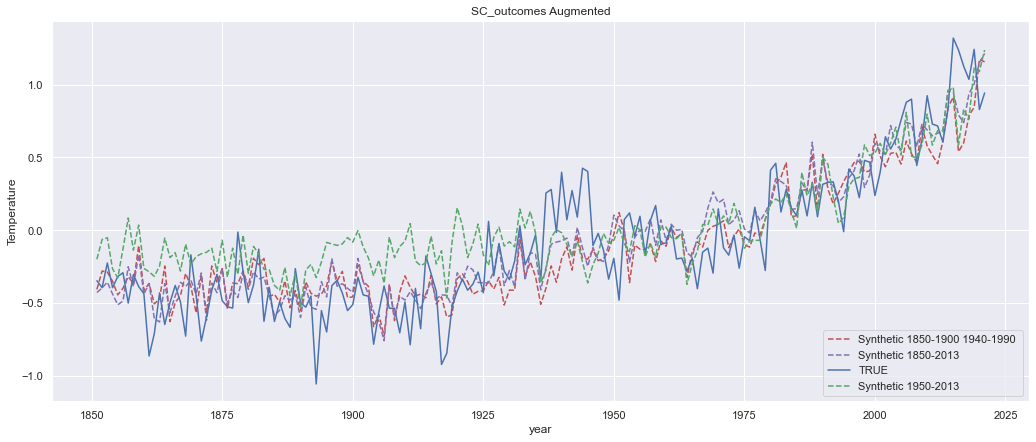

In [86]:
fig = plt.figure(figsize=(17.5,7)) 
#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");

plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc2),'r--', label="Synthetic 1850-1900 1940-1990 ");
#plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc0),'k--', label="Synthetic 1863-1913, 1963-2013");
#plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc_weight),'m--', label="Synthetic 1850-2013");
#plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc5),'w--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),true_outcomes, 'b-', label="TRUE");
plt.plot(range(1851,2022),(X0_all_plot.T).dot(wasc1),'g--', label="Synthetic 1950-2013");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes Augmented")
plt.show()
fig.savefig("sc1_weight_augmented", dpi=300)

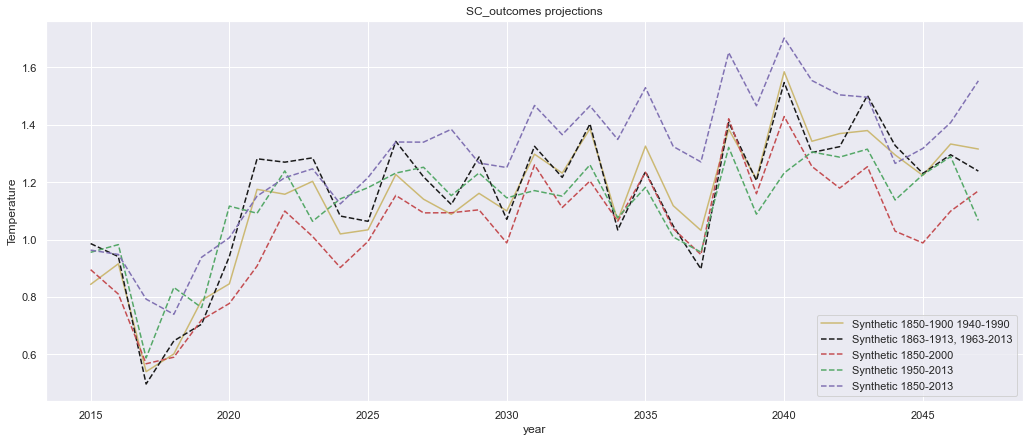

In [87]:
fig = plt.figure(figsize=(17.5,7))
plt.plot(range(2015,2048),(X).dot(wasc2),'y-', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(2015,2048),(X).dot(wasc0),'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(2015,2048),(X).dot(wasc4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(2015,2048),(X).dot(wasc1),'g--', label="Synthetic 1950-2013");
plt.plot(range(2015,2048),(X).dot(wasc_weight),'m--', label="Synthetic 1850-2013");
#plt.plot(range(1851,2022),X1_trend.values, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes projections")
fig.savefig("sc2_weight_augm_proj")
plt.show()

In [90]:

true_error = remain_error(wasc0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', wasc0)


#use 100-163
true_error =  remain_error(wasc1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', wasc1)


#use100-150

true_error =  remain_error(wasc5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', wasc5)


#use 90-140 0-50
true_error = remain_error(wasc2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', wasc2)





#use 0-150

true_error = remain_error(wasc4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)
print('W:', wasc4)



true_error = remain_error(wasc_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', wasc_weight)


KeyError: '[164, 165, 166, 167, 168, 169] not in index'

In [88]:

true_error = remain_error(wasc0, X0_trend.T,X1_trend, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)
print('W:', wasc0)


#use 100-163
true_error =  remain_error(wasc1, X0_trend.T,X1_trend, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)
print('W:', wasc1)


#use100-150

true_error =  remain_error(wasc5, X0_trend.T,X1_trend, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)
print('W:', wasc5)


#use 90-140 0-50
true_error = remain_error(wasc2, X0_trend.T,X1_trend, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', wasc2)





#use 0-150

true_error = remain_error(wasc4, X0_trend.T,X1_trend, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)
print('W:', wasc4)



true_error = remain_error(wasc_weight, X0_trend.T,X1_trend, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', wasc_weight)


mean squared reconstruction error using T=13-63, 113-163:  0.09727099891278525
validation error:  0.217582148571587
W: [ 2.65060536e-16 -8.04575474e-02  2.23558004e-15  4.19430314e-01
  3.20670548e-01  7.03326933e-03  8.98018833e-02  2.30880780e-01
  3.86791238e-15 -2.36238902e-01 -7.38395529e-02]
mean squared reconstruction error using T=100-163:  0.11680085494395251
validation error:  0.27139380225351817
W: [-2.30541693e-16 -5.09637830e-02  4.40407377e-16  2.67193913e-01
  2.79661131e-02  5.49367528e-02  1.13589853e-01  4.74086363e-01
 -4.61202414e-02  2.93291264e-17 -8.45939919e-02]
mean squared reconstruction error using T=100-150:  0.12155307344618645
validation error:  0.31855125612091717
W: [-5.21540856e-04  6.04303642e-15 -1.34020216e-01  2.69662481e-01
  1.21447486e-02 -1.15606806e-16  2.02347932e-01  3.27371303e-01
  1.24735627e-02 -1.29296466e-16 -6.84894919e-02]
mean squared reconstruction error using T=90-140 0-50:  0.10362778957869737
validation error:  0.1563248022840266

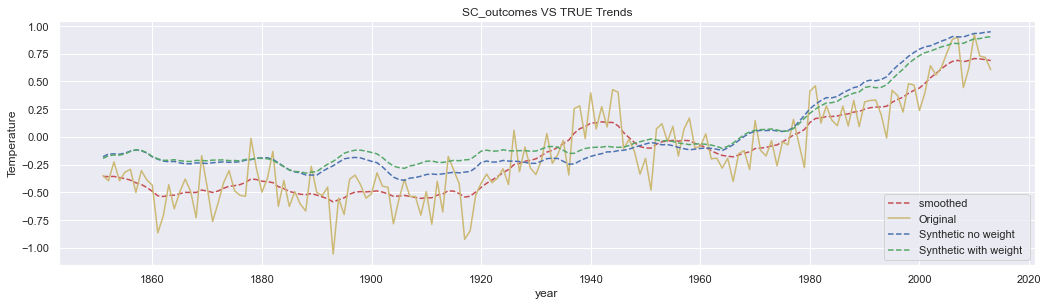

[1.57413079e-17 2.80086764e-17 0.00000000e+00 4.12996889e-01
 5.87003111e-01 3.32652856e-17 7.64498452e-18 0.00000000e+00
 2.27363312e-17 5.40139202e-18 0.00000000e+00]
       T=120-150        T=0-50       T=10-60       T=20-70      T=50-100  \
0   0.000000e+00  0.000000e+00  0.000000e+00  7.462720e-19  0.000000e+00   
1   4.791653e-17  3.198957e-17  0.000000e+00  0.000000e+00  1.362619e-17   
2   2.039342e-17  0.000000e+00  9.889088e-17  5.251910e-17  0.000000e+00   
3   2.239007e-01  8.326673e-16  2.351103e-01  4.459121e-01  1.983578e-01   
4   0.000000e+00  1.000000e+00  7.648897e-01  5.540879e-01  8.016422e-01   
5   1.103769e-17  6.609774e-18  0.000000e+00  9.193262e-18  2.396723e-17   
6   1.089169e-16  0.000000e+00  0.000000e+00  2.477644e-17  0.000000e+00   
7   7.760993e-01  0.000000e+00  0.000000e+00  1.282706e-17  3.285999e-17   
8   0.000000e+00  5.019565e-17  0.000000e+00  0.000000e+00  0.000000e+00   
9   2.204613e-17  0.000000e+00  5.015343e-17  4.433268e-17  0.000000e+0

In [83]:
smoothed = Kalman1D(X1_all_plot)
smoothed_pred = Kalman1D((X0_all_plot.T).dot(W0_no_weight))
smoothed_pred3 = Kalman1D((X0_all_plot.T).dot(W0_weight))
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2014),smoothed, 'r--', label="smoothed ")
plt.plot(range(1851,2014),X1_all_plot, 'y-', label="Original")
plt.plot(range(1851,2014),smoothed_pred, 'b--', label="Synthetic no weight  ")
plt.plot(range(1851,2014),smoothed_pred3, 'g--', label="Synthetic with weight ")
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes VS TRUE Trends")
plt.savefig('sc5')
plt.show()
print(W)
print(w)

In [109]:
proj3 = pd.read_pickle('projections3')
predicions = proj3.dot(wasc_weight)
np.average(predicions[24:])

1.5740194635624871

In [120]:
c = mean_squared_error( X1_all_p,(X0_all_p.T).dot(wasc_weight),squared=False)
print(c)

0.21471251673289588


# Synthetic Controls with predictors

In [39]:

data = pd.read_pickle('data')
panel_data = pd.read_pickle('panel_data')
#panel_data = panel_data.drop(index=('MPI_ESM1'))
X1_all =  panel_data.loc['TRUE']
X0_all = panel_data.loc[panel_data.index != 'TRUE', :]


#use years 120-150 as predictors leave rest  for validation
X0 = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1 = X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
X0_val = X0_all.loc[:,[i for i in list(range(0, 163))]].values.T
X1_val = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)
#5-year avg
X0_mean = X0_all.loc[:,[i for i in list(range(0, 120))]].values
X1_mean = X1_all.loc[[i for i in list(range(0, 120))]].values.reshape(-1,1)
X0_mean_val = X0_all.loc[:,[i for i in list(range(120, 160))]].values
X1_mean_val = X1_all.loc[[i for i in list(range(120, 160))]].values.reshape(-1,1)
X1_mean = np.average(X1_mean.reshape(-1, 5), axis=1).reshape(-1,1)
#X0_mean = np.average(X0_mean.reshape(-1, 5), axis=1).reshape(24,13)
#X0_mean_val = np.average(X0_mean_val.reshape(-1, 5), axis=1).reshape(8,13)
X1_mean_val = np.average(X1_mean_val.reshape(-1, 5), axis=1).reshape(-1,1)
#use years 0-50
X0_zero = X0_all.loc[:,[i for i in list(range(0, 50))]].values.T
X1_zero = X1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 13-63, 113-163
X0_double_int1 = X0_all.loc[:,[i for i in list(range(13, 63))+list(range(113, 163))]].values.T
X1_double_int1 = X1_all.loc[[i for i in list(range(13, 63))+list(range(113, 163))]].values.reshape(-1,1)
#use years 100-163
X0_100_163 = X0_all.loc[:,[i for i in list(range(100, 163))]].values.T
X1_100_163 = X1_all.loc[[i for i in list(range(100, 163))]].values.reshape(-1,1)
#use years 100-150
X0_hundreed = X0_all.loc[:,[i for i in list(range(100, 150))]].values.T
X1_hundreed= X1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 90-140 0-50
X0_double_int2= X0_all.loc[:,[i for i in list(range(90, 140))+ list(range(0, 50))]].values.T
X1_double_int2 = X1_all.loc[[i for i in list(range(90, 140))+ list(range(0, 50))]].values.reshape(-1,1)
#use years 110-163
X0_110_163 = X0_all.loc[:,[i for i in list(range(110, 163))]].values.T
X1_110_163 = X1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
X0_0_150 = X0_all.loc[:,[i for i in list(range(0, 150))]].values.T
X1_0_150 = X1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)


X0_all_plot2 = X0_all.loc[:,[i for i in list(range(0, 163))]].values
X1_all_plot2 = X1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [40]:
predictors = pd.read_pickle('predictors.T')
predictors = predictors.drop(index=('MPI_ESM'))
predictors = trend.T
Z1_all = predictors.loc['TRUE']
Z0_all = predictors.loc[predictors.index != 'TRUE', :]


#use years 0-50
Z0_zero = Z0_all.loc[:,[i for i in list(range(0, 50))]].values.T
Z1_zero = Z1_all.loc[[i for i in list(range(0, 50))]].values.reshape(-1,1)
#use years 13-63, 113-163
Z0_double_int1 = Z0_all.loc[:,[i for i in list(range(13, 63))+list(range(113, 163))]].values.T
Z1_double_int1 = Z1_all.loc[[i for i in list(range(13, 63))+list(range(113, 163))]].values.reshape(-1,1)
#use years 100-163
Z0_100_163 = Z0_all.loc[:,[i for i in list(range(100, 163))]].values.T
Z1_100_163 = Z1_all.loc[[i for i in list(range(100, 163))]].values.reshape(-1,1)
#use years 100-150
Z0_hundreed =Z0_all.loc[:,[i for i in list(range(100, 150))]].values.T
Z1_hundreed= Z1_all.loc[[i for i in list(range(100, 150))]].values.reshape(-1,1)
#use years 90-140 0-50
Z0_double_int2= Z0_all.loc[:,[i for i in list(range(90, 140))+ list(range(0, 50))]].values.T
Z1_double_int2 =Z1_all.loc[[i for i in list(range(90, 140))+ list(range(0, 50))]].values.reshape(-1,1)
#use years 110-163
Z0_110_163 = Z0_all.loc[:,[i for i in list(range(110, 163))]].values.T
Z1_110_163 = Z1_all.loc[[i for i in list(range(110, 163))]].values.reshape(-1,1)
#use years 0-150
Z0_0_150 = Z0_all.loc[:,[i for i in list(range(0, 150))]].values.T
Z1_0_150 = Z1_all.loc[[i for i in list(range(0, 150))]].values.reshape(-1,1)


Z0_all_plot2 = Z0_all.loc[:,[i for i in list(range(0, 163))]].values
Z1_all_plot2 = Z1_all.loc[[i for i in list(range(0, 163))]].values.reshape(-1,1)

In [41]:
def find_trend():
    trends ={}
    for i in range(0,11):
        XT1 = Z0_all_plot2[i]#.loc[i].loc[:,[i for i in list(range(0, 163))]].values.reshape(-1,1)
        trends[i]=Kalman1D(XT1).flatten()
    trend = pd.DataFrame.from_dict(trends)
    return trend

In [42]:
#USE PREDICTORS
def w_mse(w, v, x0, x1): return mean_squared_error(x1, x0.dot(w), sample_weight=v)

def w_constraint(w, v, x0, x1): return np.sum(w) - 1

def v_constraint(V, W, X0, X1, Z0, Z1): return np.sum(V) - 1

def fun_w(w, v, x0, x1): return fmin_slsqp(w_mse, w, bounds=[(0.0, 1.0)]*len(w), f_eqcons=w_constraint, 
                                           args=(v, x0, x1), disp=False, full_output=True)[0]

def fun_v(v, w, x0, x1, z0, z1): return mean_squared_error(z1, z0.dot(fun_w(w, v, x0, x1)))

def solve_synthetic_control2(X0, X1, Z0, Z1,weight=False):
    k,j = X0.shape
    V0 = 1/k*np.ones(k)
    l = np.linspace(1/k,1,k,endpoint=True)

    if weight:
        for i in range(0,k):
            V0[i]=l[i]*2
    W0 = 1/j*np.zeros(j).transpose()
    W0 = 1/j*np.zeros(j).transpose()
    V = fmin_slsqp(fun_v, V0, args=(W0, X0, X1, Z0, Z1), bounds=[(0.0, 1.0)]*len(V0), disp=True, f_eqcons=v_constraint, acc=1e-6)
    W = fun_w(W0, V, X0, X1)
    return V, W

V, W = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),  X0_0_150, X1_0_150)
#V, W = solve_synthetic_control(X0, X1, X0_val, X1_val)
#print(V)
#print(W)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08188506092569182
            Iterations: 3
            Function evaluations: 911
            Gradient evaluations: 3


In [43]:
def remain_error(W, df_donors,df_true, low_bound1,up_bound1,low_bound2,up_bound2):
    if(low_bound2 ==0):
        l = list(range(0, low_bound1))+list(range(up_bound1+1, 163))
    else:   
        l = list(range(0, low_bound1))+list(range(up_bound1+1, low_bound2)) +list(range(up_bound2+1, 163))
    df1 = df_true.loc[[i for i in l]].values.reshape(-1,1)
    df0 = df_donors.loc[:,[i for i in l]].values
    return mean_squared_error( df1,(df0.T).dot(W),squared=False) 
    

In [44]:

w3 = pd.DataFrame()
w3list =[]

#use 13-63, 113-163
V0, W0 = solve_synthetic_control2(np.vstack((X0_double_int1,Z0_double_int1)), np.vstack((X1_double_int1,Z1_double_int1)),X0_double_int1,X1_double_int1,True)
SC_outcomes0 = (X0_all_plot2.T).dot(W0)
true_outcomes = X1_all_plot2
true_error = remain_error(W0, X0_all,X1_all, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0)))
print('validation error: ', true_error)
print('W:', W0)
w3['T=3-63, 113-163'] = W0
w3list.append(W0)

#use 100-163
V0, W1 = solve_synthetic_control2(np.vstack((X0_100_163,Z0_100_163)), np.vstack((X1_100_163,Z1_100_163)),X0_100_163,X1_100_163,True)
SC_outcomes1 = (X0_all_plot2.T).dot(W1)
true_outcomes = X1_all_plot2
true_error =  remain_error(W1, X0_all,X1_all, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W1)))
print('validation error: ', true_error)
print('W:', W1)
w3['T=100-163'] = W1
w3list.append(W1)

#use100-150
V0, W5 = solve_synthetic_control2(np.vstack((X0_hundreed,Z0_hundreed)), np.vstack((X1_hundreed,Z1_hundreed)),X0_hundreed,X1_hundreed,True)
SC_outcomes5 = (X0_all_plot2.T).dot(W0)
true_outcomes = X1_all_plot2
true_error =  remain_error(W5, X0_all,X1_all, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W5)))
print('validation error: ', true_error)
print('W:', W5)
w3['T=100-150'] = W5
w3list.append(W5)
#use 90-140 0-50
V0, W2 = solve_synthetic_control2(np.vstack((X0_double_int2,Z0_double_int2)), np.vstack((X1_double_int2,Z1_double_int2)),X0_double_int2,X1_double_int2,True)
SC_outcomes2 = (X0_all_plot2.T).dot(W2)
true_outcomes = X1_all_plot2
true_error = remain_error(W2, X0_all,X1_all, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)
w3['T=90-140 0-50'] = W2
w3list.append(W2)




#use 0-150
V0, W4 = solve_synthetic_control2(np.vstack((X0_0_150,Z0_0_150)), np.vstack((X1_0_150,Z1_0_150)),X0_0_150,X1_0_150,True)
SC_outcomes4 = (X0_all_plot2.T).dot(W4)
true_outcomes = X1_all_plot2
true_error = remain_error(W4, X0_all,X1_all, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W4)))
print('validation error: ', true_error)
print('W:', W4)
w3['T=0-150'] = W4
w3list.append(W4)

fig = plt.figure(figsize=(17.5,4.5)) 

V0, W0_no_weight = solve_synthetic_control2(np.vstack((X0_all_plot2.T,Z0_all_plot2.T)), np.vstack((X1_all_plot2,Z1_all_plot2)),X0_all_plot2.T,X1_all_plot2,True )
SC_outcomes_all = (X0_all_plot2.T).dot(W0_no_weight)
true_outcomes = X1_all_plot2
true_error = 0
#true_error = remain_error(W0_no_weight, X0_all,X1_all, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0_no_weight)))
print('validation error:  ', true_error)
print('W:', W0_no_weight)
w3['T=0-163'] = W0_no_weight
w3list.append(W0_no_weight)

#plt.plot(range(1851,2014),SC_outcomes_w, 'r--', label="Synthetic weights ");



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.08955292140036983
            Iterations: 3
            Function evaluations: 608
            Gradient evaluations: 3
mean squared reconstruction error using T=13-63, 113-163:  0.08961184104696956
validation error:  0.3014657916895821
W: [0.00000000e+00 0.00000000e+00 1.63810444e-17 6.27503066e-01
 1.47791240e-16 9.06453541e-18 1.13397733e-17 3.72496934e-01
 0.00000000e+00 6.79368126e-18 0.00000000e+00]
Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.05555804461210122
            Iterations: 5
            Function evaluations: 638
            Gradient evaluations: 5
mean squared reconstruction error using T=100-163:  0.11549481536484223
validation error:  0.39147794438393213
W: [7.82120948e-18 1.69709443e-17 0.00000000e+00 3.31480668e-01
 0.00000000e+00 0.00000000e+00 3.67753158e-17 6.68519332e-01
 2.32064238e-17 1.79442032e-17 2.26284814e-17]
Optimiza

<Figure size 1260x324 with 0 Axes>

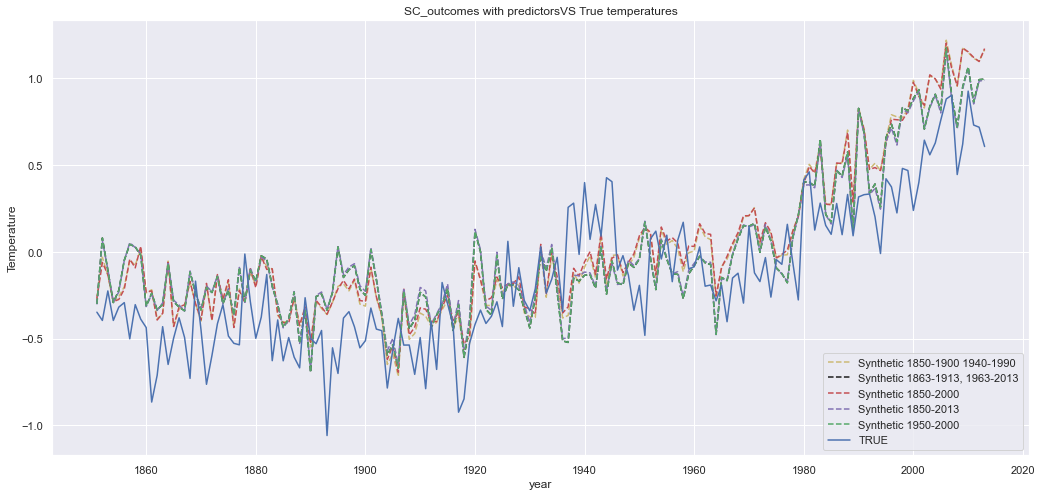

0.08961184104696956
[0.00000000e+00 0.00000000e+00 1.63810444e-17 6.27503066e-01
 1.47791240e-16 9.06453541e-18 1.13397733e-17 3.72496934e-01
 0.00000000e+00 6.79368126e-18 0.00000000e+00]


In [249]:
fig = plt.figure(figsize=(17.5,8)) 
plt.plot(range(1851,2014),SC_outcomes2,'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2014),SC_outcomes0,'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2014),SC_outcomes4,'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2014),SC_outcomes_all,'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2014),SC_outcomes5,'g--', label="Synthetic 1950-2000");
plt.plot(range(1851,2014),true_outcomes, 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes with predictorsVS True temperatures")
plt.show()
fig.savefig("sc1_with_predictors", dpi=300)
print(mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0)))
print(W0)
 

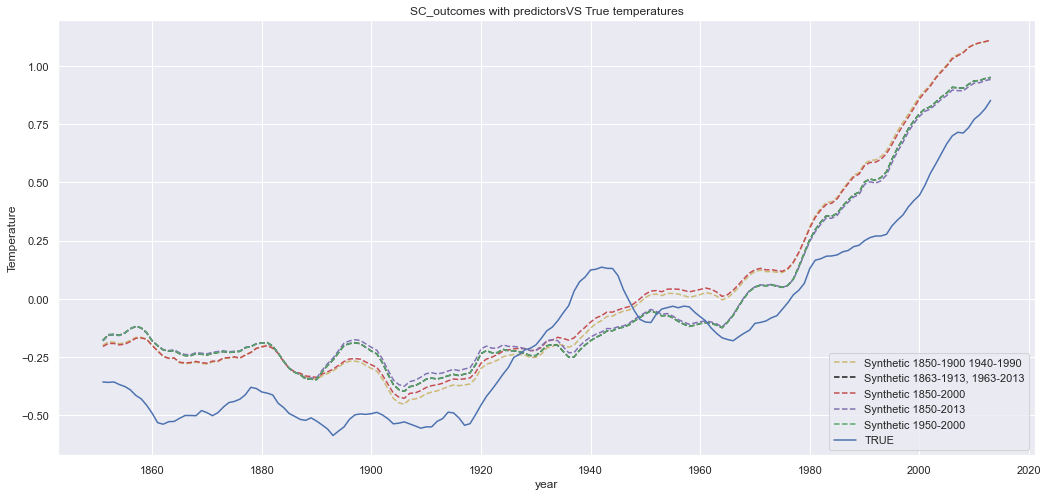

0.08961184104696956
[0.00000000e+00 0.00000000e+00 1.63810444e-17 6.27503066e-01
 1.47791240e-16 9.06453541e-18 1.13397733e-17 3.72496934e-01
 0.00000000e+00 6.79368126e-18 0.00000000e+00]


In [250]:
fig = plt.figure(figsize=(17.5,8)) 
plt.plot(range(1851,2014),Kalman1D(SC_outcomes2).flatten(),'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2014),Kalman1D(SC_outcomes0).flatten(),'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(1851,2014),Kalman1D(SC_outcomes4).flatten(),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2014),Kalman1D(SC_outcomes_all).flatten(),'m--', label="Synthetic 1850-2013");
plt.plot(range(1851,2014),Kalman1D(SC_outcomes5).flatten(),'g--', label="Synthetic 1950-2000");
plt.plot(range(1851,2014),X1_trend.T.loc[:,[i for i in list(range(0, 163))]].values.flatten(), 'b-', label="TRUE");
plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='lower right')
plt.title("SC_outcomes with predictorsVS True temperatures")
plt.show()
fig.savefig("sc1_with_predictors_trends", dpi=300)
print(mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0)))
print(W0)

In [48]:




#use 13-63, 113-163

true_outcomes = X1_all_plot
true_error = remain_error(w3list[0], X0_trend.T,X1_trend, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)


#use 100-163

true_outcomes = X1_all_plot
true_error =  remain_error(w3list[1], X0_trend.T,X1_trend, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)


#use100-150

true_outcomes = X1_all_plot
true_error =  remain_error(w3list[2], X0_trend.T,X1_trend, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)


#use 90-140 0-50

true_outcomes = X1_all_plot
true_error = remain_error(w3list[3], X0_trend.T,X1_trend, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)


#use 0-150

true_outcomes = X1_all_plot
true_error = remain_error(w3list[4], X0_trend.T,X1_trend, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)


true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(w3list[5], X0_trend.T,X1_trend, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)



mean squared reconstruction error using T=13-63, 113-163:  0.09727099891278525
validation error:  0.20006824935024825
mean squared reconstruction error using T=100-163:  0.11680085494395251
validation error:  0.3089240358361907
mean squared reconstruction error using T=100-150:  0.12155307344618645
validation error:  0.3116135564175553
mean squared reconstruction error using T=90-140 0-50:  0.10362778957869737
validation error:  0.2887952630594079
W: [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.82278513e-01
 2.95311247e-01 0.00000000e+00 0.00000000e+00 2.22410239e-01
 7.27177598e-17 4.53205838e-17 0.00000000e+00]
mean squared reconstruction error using T=0-150:  0.10301715732443568
validation error:  0.4279865094544669
mean squared reconstruction error using T=0-163:  0.09655935204381151
validation error:   0.28921705545733933


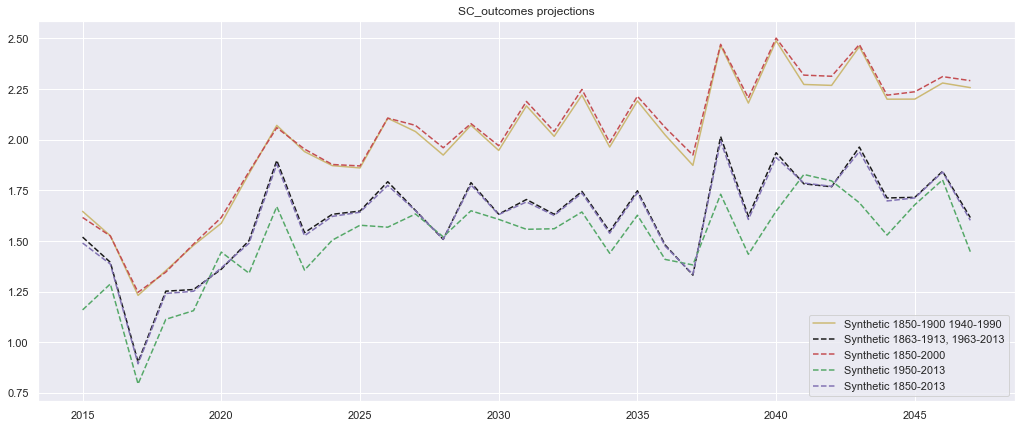

0.4314140726338402


In [251]:
fig = plt.figure(figsize=(17.5,7))
plt.plot(range(2015,2048),(X).dot(W2),'y-', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(2015,2048),(X).dot(W0),'k--', label="Synthetic 1863-1913, 1963-2013");
plt.plot(range(2015,2048),(X).dot(W4),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(2015,2048),(X).dot(W1),'g--', label="Synthetic 1950-2013");
plt.plot(range(2015,2048),(X).dot(W0_no_weight),'m--', label="Synthetic 1850-2013");
#plt.plot(range(1851,2022),X1_trend.values, 'b-', label="TRUE");

plt.legend(loc='lower right')
plt.title("SC_outcomes projections")
fig.savefig("sc2_weight_proj_predictors")
plt.show()
print(mean_squared_error( np.array(proj),predicted_temp[:8],squared=False))

In [110]:
proj3 = pd.read_pickle('projections3')
predicions = proj3.dot(w3list[5])
np.average(predicions[24:])

1.9315296732315077

In [121]:
c = mean_squared_error( X1_all_p,(X0_all_p.T).dot(w3list[5]),squared=False)
print(c)

0.2990448545576882


# Student - t approach 

In [49]:
import pymc3 as pm 

In [54]:
def mu(w,x):
        out=0
        for i in range(0,len(w)):
            out += x.T[i] * w[i]
        print((out))
        return out


with pm.Model() as studentt:
    # Prior distribution
        sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
        w1=[]
        for i in range(0,11):
            s= pm.Normal(str(i), 0.5, sigma=1)
            w1.append(s)
        n = pm.Gamma('n', alpha = 2, beta = 0.1)
    
    # Likelihood
        lik = pm.StudentT('y', nu=n, mu = mu(w1,X0_all_plot.T), sigma=sigma, observed=X1_all_plot.flatten().astype('float'))
        
    # draw 1000 posterior samples using NUTS sampling + 1000 of warmup on 4 chain
        trace_tstudent = pm.sample(1000, tune=1000)  


Elemwise{add,no_inplace}.0


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, sigma]


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


In [55]:
import arviz as az

In [56]:
res = az.summary(trace_tstudent)
w = np.array(res['mean'])[:-2]
print(w)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


[ 0.06   0.14   0.023  0.242  0.381  0.041 -0.064  0.166 -0.248  0.009
 -0.058]


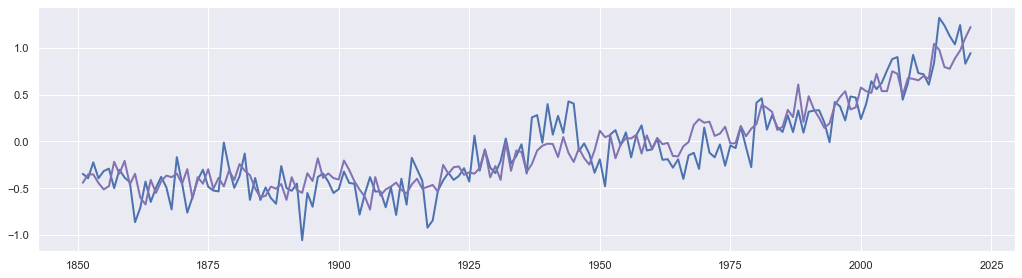

In [59]:
fig = plt.figure(figsize=(17.5,4.5)) 
plt.plot(range(1851,2022),X1_all_plot, label="true", lw=2.0)
plt.plot(range(1851,2022), X0_all_plot.T.dot(w.T), label="t-regression ", lw=2.0, color = "m")
plt.show()

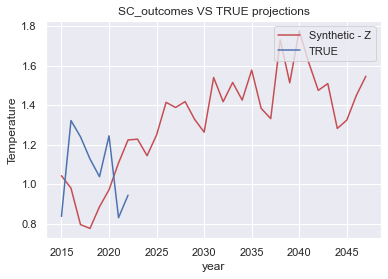

In [60]:
X= pd.read_pickle('projections')
plt.plot(range(2015,2048),X.dot(w.T), 'r-', label="Synthetic - Z")
plt.plot(range(2015,2023),proj, 'b-', label="TRUE")

plt.ylabel('Temperature')
plt.xlabel('year')
plt.legend(loc='upper right')
plt.title("SC_outcomes VS TRUE projections")

plt.show()

In [98]:
proj = X.dot(w.T).values[33-8:]
print(np.average(proj))

1.496690242111683


In [61]:
def student_t(data0, data1):
 
    def mu(w,x):
        out=0
        for i in range(0,len(w)):
            out += x.T[i] * w[i]
        print((out))
        return out


    with pm.Model() as studentt:
    # Prior distribution
        sigma = pm.HalfCauchy("sigma", beta=10, testval=1.0)
        w1=[]
        for i in range(0,11):
            s= pm.Normal(str(i), 0.5, sigma=1)
            w1.append(s)
        n = pm.Gamma('n', alpha = 2, beta = 0.1)
    
    # Likelihood
        lik = pm.StudentT('y', nu=n, mu = mu(w1,data0), sigma=sigma, observed=data1.flatten().astype('float'))
        
    # draw 1000 posterior samples using NUTS sampling + 1000 of warmup on 4 chain
        trace_tstudent = pm.sample(1000, tune=1000)  
    res = az.summary(trace_tstudent)
    w = np.array(res['mean'])[:-2]

    return w

In [62]:
X0s=[X0_double_int1, X0_100_163,X0_hundreed,X0_double_int2,X0_0_150]
X1s=[X1_double_int1, X1_100_163,X1_hundreed,X1_double_int2,X1_0_150]
ws=[]
for i in range(0,5):
    ws.append(student_t(X0s[i], X1s[i]))
    

Elemwise{add,no_inplace}.0


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, sigma]


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/arviz/data/io_pymc3_3x.py:9

Elemwise{add,no_inplace}.0


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, sigma]


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/arviz/data/io_pymc3_3x.py:9

Elemwise{add,no_inplace}.0


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, sigma]


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98

Elemwise{add,no_inplace}.0


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, sigma]


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98

Elemwise{add,no_inplace}.0


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [n, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0, sigma]


/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.
Got error No model on context stack. trying to find log_likelihood in translation.
/Users/dafnep/Library/Python/3.8/lib/python/site-packages/arviz/data/io_pymc3_3x.py:98

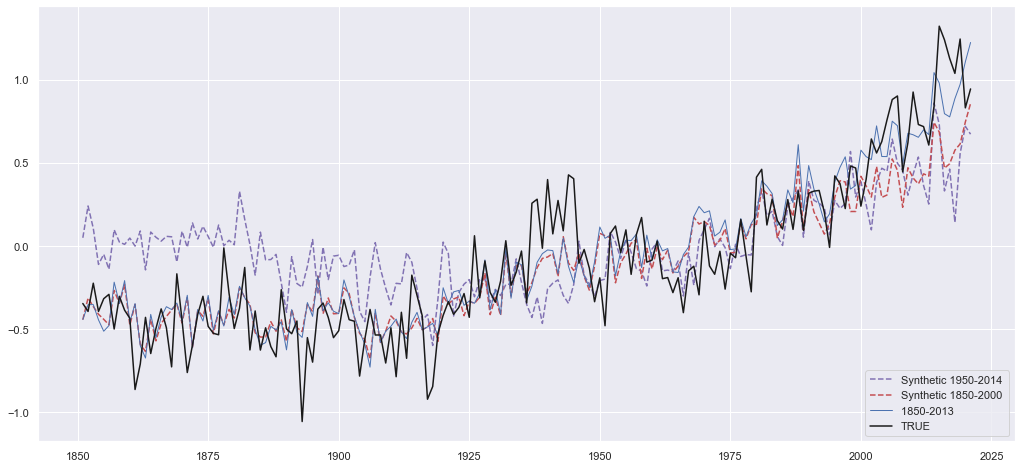

0.08961184104696956
[0.00000000e+00 0.00000000e+00 1.63810444e-17 6.27503066e-01
 1.47791240e-16 9.06453541e-18 1.13397733e-17 3.72496934e-01
 0.00000000e+00 6.79368126e-18 0.00000000e+00]


In [68]:
fig = plt.figure(figsize=(17.5,8)) 
#plt.plot(range(1851,2022),X0_all_plot.T.dot(ws[0].T),'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),X0_all_plot.T.dot(ws[2].T),'m--', label="Synthetic 1950-2014 ");
plt.plot(range(1851,2022),X0_all_plot.T.dot(ws[4].T),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022), X0_all_plot.T.dot(w.T), label="1850-2013 ", lw=1.0, color = "b")
#plt.plot(range(1851,2022),X0_all_plot.T.dot(ws[2].T),'g--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),X1_all_plot, 'k-', label="TRUE");


plt.legend(loc='lower right')

plt.show()
fig.savefig("sc1_with_studentt", dpi=300)
print(mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0)))
print(W0)

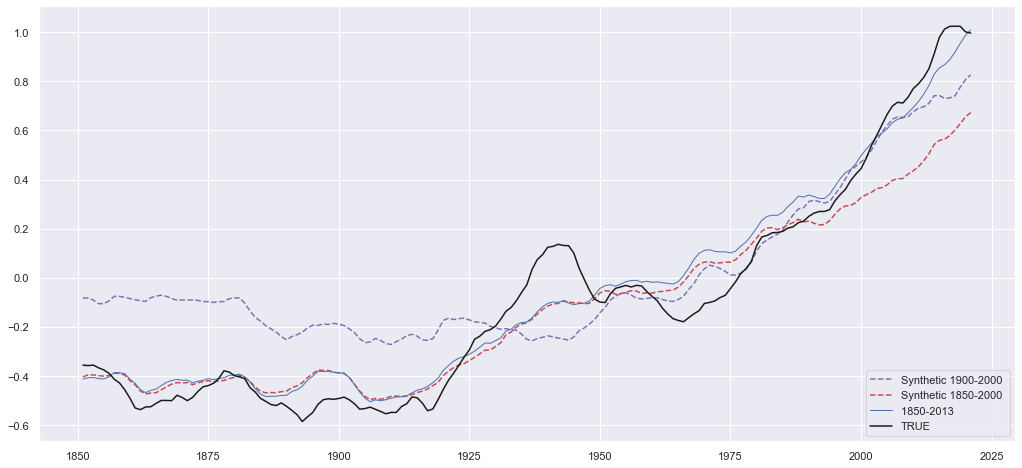

0.08961184104696956
[0.00000000e+00 0.00000000e+00 1.63810444e-17 6.27503066e-01
 1.47791240e-16 9.06453541e-18 1.13397733e-17 3.72496934e-01
 0.00000000e+00 6.79368126e-18 0.00000000e+00]


In [67]:
fig = plt.figure(figsize=(17.5,8)) 
#plt.plot(range(1851,2022),X0_all_plot.T.dot(ws[0].T),'y--', label="Synthetic 1850-1900 1940-1990 ");
plt.plot(range(1851,2022),Kalman1D(X0_all_plot.T.dot(ws[1].T)).flatten(),'m--', label="Synthetic 1900-2000");
plt.plot(range(1851,2022),Kalman1D(X0_all_plot.T.dot(ws[4].T)).flatten(),'r--', label="Synthetic 1850-2000 ");
plt.plot(range(1851,2022), Kalman1D(X0_all_plot.T.dot(w.T)).flatten(), label="1850-2013 ", lw=1.0, color = "b")
#plt.plot(range(1851,2022),X0_all_plot.T.dot(ws[2].T),'g--', label="Synthetic 1950-2000");
plt.plot(range(1851,2022),X1_trend.values, 'k-', label="TRUE");


plt.legend(loc='lower right')

plt.show()
fig.savefig("sc1_with_studentt_trends", dpi=300)
print(mean_squared_error( X1_all_plot2,(X0_all_plot2.T).dot(W0)))
print(W0)

In [69]:




#use 13-63, 113-163

true_outcomes = X1_all_plot
true_error = remain_error(ws[0], X0_trend.T,X1_trend, 13,63, 113,163)
print('mean squared reconstruction error using T=13-63, 113-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0)))
print('validation error: ', true_error)


#use 100-163

true_outcomes = X1_all_plot
true_error =  remain_error(w3list[1], X0_trend.T,X1_trend, 100,163,0,0)
print('mean squared reconstruction error using T=100-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W1)))
print('validation error: ', true_error)


#use100-150

true_outcomes = X1_all_plot
true_error =  remain_error(ws[2], X0_trend.T,X1_trend, 100,150,0,0)
print('mean squared reconstruction error using T=100-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W5)))
print('validation error: ', true_error)


#use 90-140 0-50

true_outcomes = X1_all_plot
true_error = remain_error(w3list[3], X0_trend.T,X1_trend, 0,50,90,140)
print('mean squared reconstruction error using T=90-140 0-50: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W2)))
print('validation error: ', true_error)
print('W:', W2)


#use 0-150

true_outcomes = X1_all_plot
true_error = remain_error(ws[4].T, X0_trend.T,X1_trend, 0,150,0,0)
print('mean squared reconstruction error using T=0-150: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W4)))
print('validation error: ', true_error)


true_outcomes = X1_all_plot
true_error = 0
true_error = remain_error(w.T, X0_trend.T,X1_trend, 0,163,0,0)
print('mean squared reconstruction error using T=0-163: ',mean_squared_error( X1_all_plot,(X0_all_plot.T).dot(W0_no_weight)))
print('validation error:  ', true_error)



mean squared reconstruction error using T=13-63, 113-163:  0.09727099891278525
validation error:  0.20579826216697447
mean squared reconstruction error using T=100-163:  0.11680085494395251
validation error:  0.3089240358361907
mean squared reconstruction error using T=100-150:  0.12155307344618645
validation error:  0.3728398247439753
mean squared reconstruction error using T=90-140 0-50:  0.10362778957869737
validation error:  0.2887952630594079
W: [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.82278513e-01
 2.95311247e-01 0.00000000e+00 0.00000000e+00 2.22410239e-01
 7.27177598e-17 4.53205838e-17 0.00000000e+00]
mean squared reconstruction error using T=0-150:  0.10301715732443568
validation error:  0.3438121269401774
mean squared reconstruction error using T=0-163:  0.09655935204381151
validation error:   0.10902846373808224


In [111]:
proj3 = pd.read_pickle('projections3')
predicions = proj3.dot(w.T)
np.average(predicions[24:])

1.6129484577178954